In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as numpy
import gmaps
from config import api_key
import openpyxl
import xlsxwriter

In [2]:
sfcrimedata_path="San Francisco Crime Data Set.csv"
sfcrimedata=pd.read_csv(sfcrimedata_path)


#### ALL DF with Non Criminal Removed 

In [3]:
sfonlycriminal=sfcrimedata[sfcrimedata["Category"]!="NON-CRIMINAL"]
sfonlycriminal.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,1/29/2016 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,1/29/2016 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,4/25/2016 0:00,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
5,160002869,ASSAULT,BATTERY,Friday,1/1/2016 0:00,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",1.600030e+13
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,1/2/2016 0:00,0:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405722,37.780879,"(37.7808789360214, -122.405721454567)",1.600030e+13


#### ALL Category Counts

In [4]:
crimecat_cnt=sfonlycriminal["Category"].value_counts()
crimecat_cnt

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
LIQUOR LAWS                      156
R

#### ALL Total Crime Incident Sum

In [5]:
totcrimecntall=sfonlycriminal["IncidntNum"].count()
totcrimecntall

132634

#### ALL Category Percentage of Total Crime

In [6]:
crimecat_perc=round((crimecat_cnt/totcrimecntall)*100,2)
crimecat_perc

LARCENY/THEFT                  30.47
OTHER OFFENSES                 14.78
ASSAULT                        10.24
VANDALISM                       6.48
VEHICLE THEFT                   4.84
WARRANTS                        4.46
BURGLARY                        4.37
SUSPICIOUS OCC                  4.36
MISSING PERSON                  3.27
DRUG/NARCOTIC                   3.20
ROBBERY                         2.49
FRAUD                           1.99
SECONDARY CODES                 1.39
TRESPASS                        1.37
WEAPON LAWS                     1.25
SEX OFFENSES, FORCIBLE          0.71
STOLEN PROPERTY                 0.66
RECOVERED VEHICLE               0.55
DISORDERLY CONDUCT              0.50
PROSTITUTION                    0.48
FORGERY/COUNTERFEITING          0.47
DRUNKENNESS                     0.35
DRIVING UNDER THE INFLUENCE     0.28
ARSON                           0.22
KIDNAPPING                      0.19
EMBEZZLEMENT                    0.13
LIQUOR LAWS                     0.12
R

#### BAR Chart of Peercentage of All Crime Incidents Represented by Each Category

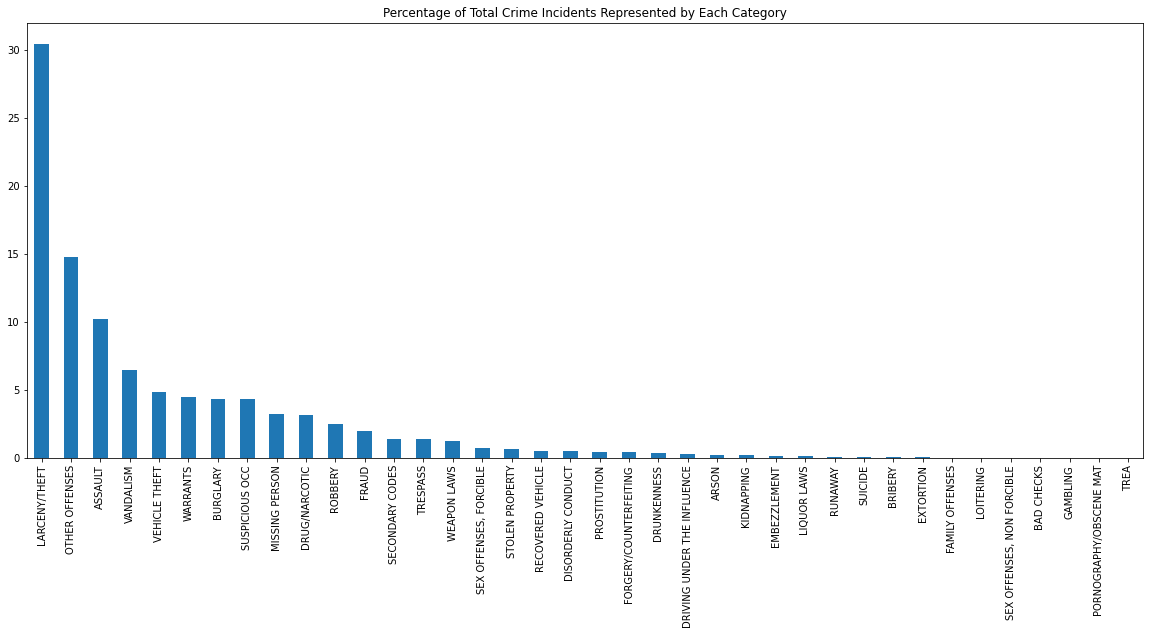

In [7]:
barpercall=crimecat_perc.plot(kind="bar", title="Percentage of Total Crime Incidents Represented by Each Category",figsize=(20,8))
plt.savefig("Perc All by Cat.png")

#### All Crime by Description Counts

In [8]:
crimedescript_cnt=sfonlycriminal["Descript"].value_counts()
crimedescript_cnt

GRAND THEFT FROM LOCKED AUTO                             17741
PETTY THEFT OF PROPERTY                                   4416
MALICIOUS MISCHIEF, VANDALISM                             4262
BATTERY                                                   4211
PETTY THEFT FROM LOCKED AUTO                              3994
                                                         ...  
ASSAULT OR ATTEMPTED MURDER UPON GOV'T OFFICERS              1
FALSIFICATION OF MEDICAL RECORDS                             1
VIN SWITCH                                                   1
WEAPON, POSSESSING IN PUBLIC BUILDING OR OPEN MEETING        1
SALE OF ALCOHOL AFTER HOURS                                  1
Name: Descript, Length: 691, dtype: int64

#### All LAT LONG Extent of Total Area

In [9]:
sflatmax=sfonlycriminal["Y"].max()
sflatmin=sfonlycriminal["Y"].min()
sflngmax=sfonlycriminal["X"].max()
sflngmin=sfonlycriminal["X"].min()
print(f"{sflatmin},{sflngmin} to {sflatmax},{sflngmax}")

37.70796836,-122.51364209999998 to 37.81997549,-122.36556540000001


In [10]:
# Scatter plot of all crimes - throwaway
# sfonlycriminal.plot.scatter(x="X", y="Y", figsize=(24,10))

In [11]:
gmaps.configure(api_key=api_key)


#### HeatMap of All crimes 

In [91]:
crime_coords=sfonlycriminal[["Y", "X"]]
fig=gmaps.figure()
layer=gmaps.heatmap_layer(crime_coords)
fig.add_layer(layer)

layer.max_intensity = 100
layer.point_radius = 15
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
crime_list=sfcrimedata["Category"].unique()
# print(crime_list)

In [14]:
resolution_list=sfcrimedata["Resolution"].unique()
# print(resolution_list)

#### Heatmap of Car Theft Related Crime for all SF

In [15]:
allcartheft=sfonlycriminal[(sfonlycriminal["Category"]=="VEHICLE THEFT")|(sfonlycriminal["Category"]=="RECOVERED VEHICLE")]

In [16]:
allcar_coords=allcartheft[["Y", "X"]]
figcar=gmaps.figure(map_type="SATELLITE")
layercar=gmaps.heatmap_layer(allcar_coords)
figcar.add_layer(layercar)

layercar.max_intensity = 100
layercar.point_radius = 15
figcar

Figure(layout=FigureLayout(height='420px'))

#### Heatmap of Personal Violence realted crimes for all SF

In [17]:
allpersattk=sfonlycriminal[(sfonlycriminal["Category"]=="ASSAULT")|(sfonlycriminal["Category"]=="SEX OFFENSES, FORCIBLE")|(sfonlycriminal["Category"]=="KIDNAPPING")]

In [18]:
allper_coords=allpersattk[["Y", "X"]]
figper=gmaps.figure(map_type="SATELLITE")
layerper=gmaps.heatmap_layer(allper_coords)
figper.add_layer(layerper)

layerper.max_intensity = 100
layerper.point_radius = 10
figper

Figure(layout=FigureLayout(height='420px'))

#### Count of Resolution Types for All Incidents

In [19]:
resolcnt=sfonlycriminal["Resolution"].value_counts()
resolcnt

NONE                                      91937
ARREST, BOOKED                            38147
UNFOUNDED                                  1035
JUVENILE BOOKED                            1032
EXCEPTIONAL CLEARANCE                       241
ARREST, CITED                               144
CLEARED-CONTACT JUVENILE FOR MORE INFO       52
LOCATED                                      18
NOT PROSECUTED                               16
PSYCHOPATHIC CASE                             5
JUVENILE CITED                                3
JUVENILE DIVERTED                             2
COMPLAINANT REFUSES TO PROSECUTE              2
Name: Resolution, dtype: int64

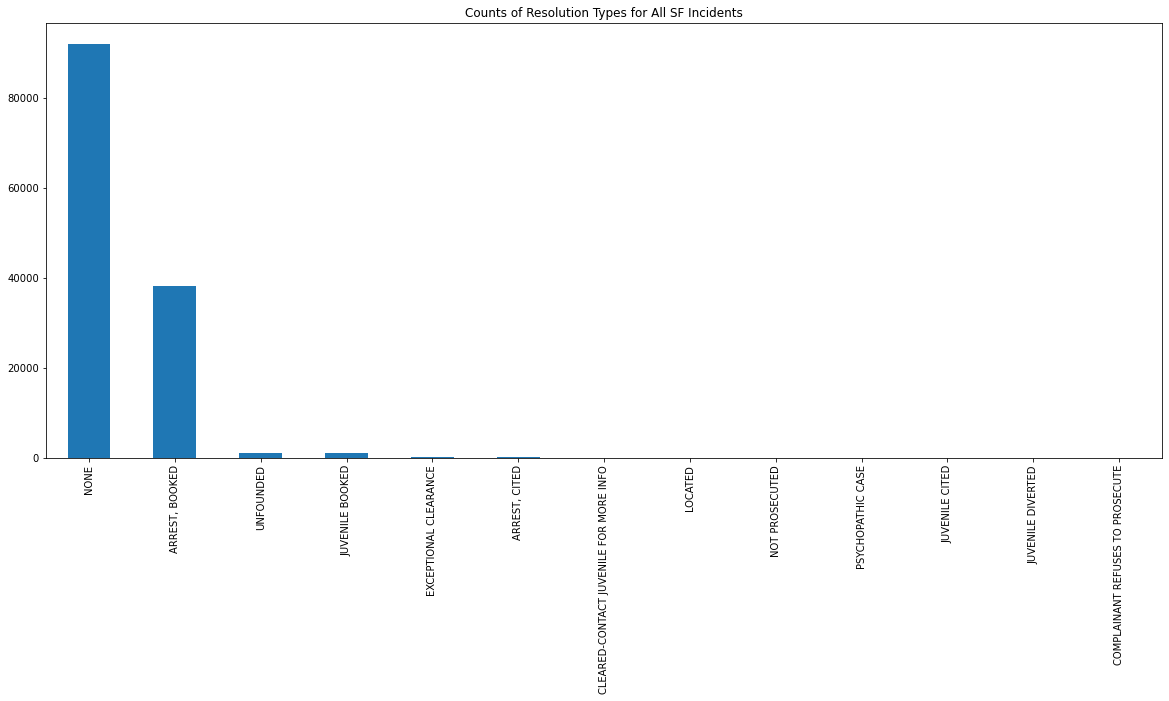

In [20]:
barresall=resolcnt.plot(kind="bar", title="Counts of Resolution Types for All SF Incidents",figsize=(20,8))
plt.savefig("Resol All Incid.png")

# DISTRICTS

#### Create Subsets of Data by District

In [21]:
# List of Districts
district_list=sfcrimedata["PdDistrict"].unique()
print(district_list)

['SOUTHERN' 'BAYVIEW' 'TENDERLOIN' 'MISSION' 'NORTHERN' 'TARAVAL'
 'INGLESIDE' 'CENTRAL' 'RICHMOND' 'PARK' nan]


In [22]:
sout_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="SOUTHERN"]


In [23]:
bayv_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="BAYVIEW"]


In [24]:
tend_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="TENDERLOIN"]

In [25]:
miss_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="MISSION"]

In [26]:
nort_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="NORTHERN"]

In [27]:
tara_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="TARAVAL"]

In [28]:
ingl_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="INGLESIDE"]

In [29]:
cent_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="CENTRAL"]

In [30]:
rich_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="RICHMOND"]

In [31]:
park_dist_df=sfonlycriminal[sfonlycriminal["PdDistrict"]=="PARK"]

## Counts of All Crimes By District

#### Southern Category Count

In [32]:
allcrimes_sout_cnt=sout_dist_df["Category"].value_counts()
allcrimes_sout_cnt
# ac_sout_df=pd.DataFrame(allcrimes_sout_cnt)
# ac_sout_df

LARCENY/THEFT                  9203
OTHER OFFENSES                 3336
ASSAULT                        2352
VANDALISM                      1439
WARRANTS                       1367
SUSPICIOUS OCC                  962
DRUG/NARCOTIC                   923
BURGLARY                        842
MISSING PERSON                  617
VEHICLE THEFT                   613
ROBBERY                         588
FRAUD                           482
TRESPASS                        391
WEAPON LAWS                     306
PROSTITUTION                    262
SECONDARY CODES                 255
STOLEN PROPERTY                 195
SEX OFFENSES, FORCIBLE          184
DISORDERLY CONDUCT              142
FORGERY/COUNTERFEITING          129
RECOVERED VEHICLE               109
DRUNKENNESS                      88
DRIVING UNDER THE INFLUENCE      66
EMBEZZLEMENT                     40
KIDNAPPING                       34
ARSON                            33
LIQUOR LAWS                      20
RUNAWAY                     

#### Percentage of Each Category for All SF that is Represented by Southern

In [33]:
soutcntperc=round((allcrimes_sout_cnt/crimecat_cnt)*100,2)
soutcntperc

ARSON                          11.54
ASSAULT                        17.32
BAD CHECKS                     17.65
BRIBERY                        12.12
BURGLARY                       14.51
DISORDERLY CONDUCT             21.58
DRIVING UNDER THE INFLUENCE    17.46
DRUG/NARCOTIC                  21.75
DRUNKENNESS                    18.92
EMBEZZLEMENT                   23.81
EXTORTION                      13.33
FAMILY OFFENSES                 7.55
FORGERY/COUNTERFEITING         20.84
FRAUD                          18.29
GAMBLING                       20.00
KIDNAPPING                     13.23
LARCENY/THEFT                  22.77
LIQUOR LAWS                    12.82
LOITERING                      21.43
MISSING PERSON                 14.22
OTHER OFFENSES                 17.02
PORNOGRAPHY/OBSCENE MAT          NaN
PROSTITUTION                   40.87
RECOVERED VEHICLE              14.81
ROBBERY                        17.82
RUNAWAY                         7.14
SECONDARY CODES                13.85
S

#### Southern Description Count

In [34]:
crimedescript_sout_cnt=sout_dist_df["Descript"].value_counts()

#### BAR Chart of Crime Category Counts for Southern

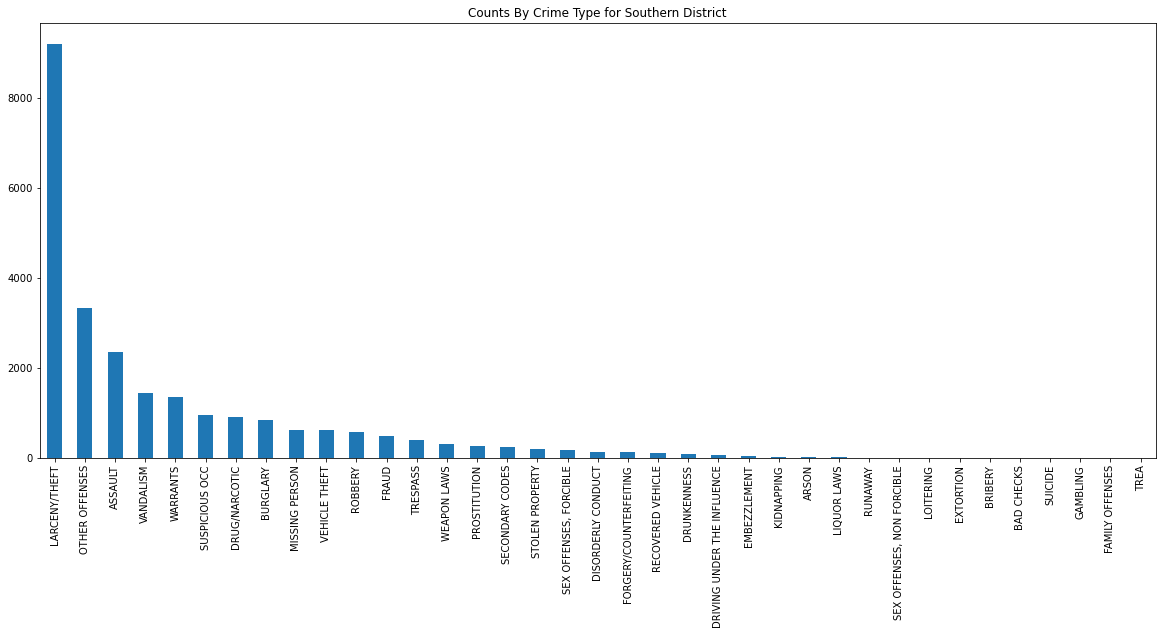

In [35]:
barsout=allcrimes_sout_cnt.plot(kind="bar", title="Counts By Crime Type for Southern District",figsize=(20,8))
plt.savefig("Count Southern Cat.png")

#### Count of Resolution Types for Southern

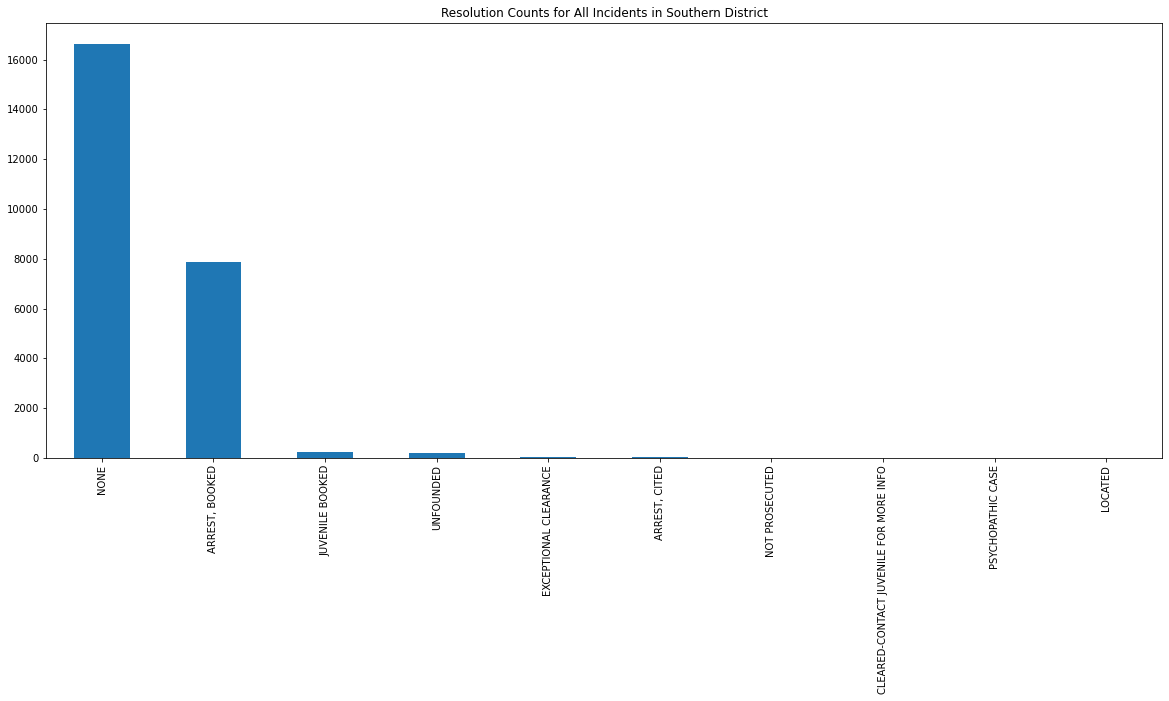

In [36]:
soutrescnt=sout_dist_df["Resolution"].value_counts()
barres_sout=soutrescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Southern District",figsize=(20,8))
plt.savefig("Resol Counts Southern.png")

#### Counts of Crimes on Each Day of the Week for Southern

In [37]:
alldays_sout_cnt=sout_dist_df["DayOfWeek"].value_counts()


#### Count of Total Number of Crimes in Southern

In [38]:
totcrimesout_cnt=sout_dist_df["IncidntNum"].count()
totcrimesout_cnt

25043

#### Category Percentage of Total Crime for Southern

In [39]:
allcrimes_sout_perc=round((allcrimes_sout_cnt/28445)*100,2)
allcrimes_sout_perc

LARCENY/THEFT                  32.35
OTHER OFFENSES                 11.73
ASSAULT                         8.27
VANDALISM                       5.06
WARRANTS                        4.81
SUSPICIOUS OCC                  3.38
DRUG/NARCOTIC                   3.24
BURGLARY                        2.96
MISSING PERSON                  2.17
VEHICLE THEFT                   2.16
ROBBERY                         2.07
FRAUD                           1.69
TRESPASS                        1.37
WEAPON LAWS                     1.08
PROSTITUTION                    0.92
SECONDARY CODES                 0.90
STOLEN PROPERTY                 0.69
SEX OFFENSES, FORCIBLE          0.65
DISORDERLY CONDUCT              0.50
FORGERY/COUNTERFEITING          0.45
RECOVERED VEHICLE               0.38
DRUNKENNESS                     0.31
DRIVING UNDER THE INFLUENCE     0.23
EMBEZZLEMENT                    0.14
KIDNAPPING                      0.12
ARSON                           0.12
LIQUOR LAWS                     0.07
R

#### Sorted DF  - Category and Descr for Southern

In [40]:
sout_sort_df=sout_dist_df.sort_values(["Category", "Descript"])


#### LAT LONG Extents for South

In [41]:
minlat=sout_dist_df["Y"].min()
maxlat=sout_dist_df["Y"].max()
minlng=sout_dist_df["X"].min()
maxlng=sout_dist_df["X"].max()
print(minlat,minlng,maxlat,maxlng)

37.73310741 -122.4483071 37.809670700000005 -122.36556540000001


#### INTERESTING NOTE FOR LOCATIONS OF CRIMES IN DISTRICT

In [42]:
# interesting to note how all the crime is concentrated beween like 37.76-37.8 and -122.43--122.39

In [43]:
# add a scatter of type of crime by district by lat,lng - for the biggest crimes for area create seperate dataframe subsets and plot X,Y

#### HeatMap of Car Theft Crimes for South

In [44]:
soutcartheft=sout_dist_df[(sout_dist_df["Category"]=="VEHICLE THEFT")|(sout_dist_df["Category"]=="RECOVERED VEHICLE")]


In [45]:
soutcar_coords=soutcartheft[["Y", "X"]]
figcar=gmaps.figure(map_type="SATELLITE")
layercar=gmaps.heatmap_layer(soutcar_coords)
figcar.add_layer(layercar)

layercar.max_intensity = 100
layercar.point_radius = 20
figcar

Figure(layout=FigureLayout(height='420px'))

#### HeatMap of Personal Violence Crimes in South

In [46]:
soutpersattk=sout_dist_df[(sout_dist_df["Category"]=="ASSAULT")|(sout_dist_df["Category"]=="SEX OFFENSES, FORCIBLE")|(sout_dist_df["Category"]=="KIDNAPPING")]


In [47]:
soutper_coords=soutpersattk[["Y", "X"]]
figper=gmaps.figure()
layerper=gmaps.heatmap_layer(soutper_coords)
figper.add_layer(layerper)

layerper.max_intensity = 100
layerper.point_radius = 15
figper

Figure(layout=FigureLayout(height='420px'))

#### Experminet to see where crimes are concentrated in District 

In [48]:
soutmeanlat=soutpersattk["Y"].mean()
soutmodelat=soutpersattk["Y"].mode()
soutmeanlng=soutpersattk["X"].mean()
soutmodelng=soutpersattk["X"].mode()
print(soutmeanlat,soutmodelat,soutmeanlng,soutmodelng)
print("Right in front of the door of the county courthouse")

37.780174416276026 0    37.775421
dtype: float64 -122.4057955435402 0   -122.403405
dtype: float64
Right in front of the door of the county courthouse


#### Crime Counts by Category for Bayview 

In [49]:
allcrimes_bayv_cnt=bayv_dist_df["Category"].value_counts()
allcrimes_bayv_cnt

LARCENY/THEFT                  2357
OTHER OFFENSES                 2353
ASSAULT                        1775
VEHICLE THEFT                  1081
VANDALISM                      1059
SUSPICIOUS OCC                  610
WARRANTS                        548
BURGLARY                        521
MISSING PERSON                  484
DRUG/NARCOTIC                   327
ROBBERY                         314
WEAPON LAWS                     306
SECONDARY CODES                 254
RECOVERED VEHICLE               196
FRAUD                           132
TRESPASS                        125
SEX OFFENSES, FORCIBLE           88
ARSON                            71
KIDNAPPING                       60
STOLEN PROPERTY                  59
DISORDERLY CONDUCT               49
FORGERY/COUNTERFEITING           38
RUNAWAY                          30
DRUNKENNESS                      27
DRIVING UNDER THE INFLUENCE      27
EMBEZZLEMENT                     23
LIQUOR LAWS                      20
BRIBERY                     

#### Percentage of aall crimes by category represented by Bayview

In [50]:
bayvcntperc=round((allcrimes_bayv_cnt/crimecat_cnt)*100,2)
bayvcntperc

ARSON                          24.83
ASSAULT                        13.07
BAD CHECKS                     11.76
BRIBERY                        30.30
BURGLARY                        8.98
DISORDERLY CONDUCT              7.45
DRIVING UNDER THE INFLUENCE     7.14
DRUG/NARCOTIC                   7.71
DRUNKENNESS                     5.81
EMBEZZLEMENT                   13.69
EXTORTION                      13.33
FAMILY OFFENSES                18.87
FORGERY/COUNTERFEITING          6.14
FRAUD                           5.01
GAMBLING                       20.00
KIDNAPPING                     23.35
LARCENY/THEFT                   5.83
LIQUOR LAWS                    12.82
LOITERING                       4.76
MISSING PERSON                 11.16
OTHER OFFENSES                 12.01
PORNOGRAPHY/OBSCENE MAT          NaN
PROSTITUTION                    0.47
RECOVERED VEHICLE              26.63
ROBBERY                         9.52
RUNAWAY                        21.43
SECONDARY CODES                13.80
S

#### Heatmap of car theft crimes in Bayview

In [51]:
bayvcartheft=bayv_dist_df[(bayv_dist_df["Category"]=="VEHICLE THEFT")|(bayv_dist_df["Category"]=="RECOVERED VEHICLE")]


In [52]:
bayvcar_coords=bayvcartheft[["Y", "X"]]
figcar=gmaps.figure(map_type="SATELLITE")
layercar=gmaps.heatmap_layer(bayvcar_coords)
figcar.add_layer(layercar)

layercar.max_intensity = 100
layercar.point_radius = 15
figcar

Figure(layout=FigureLayout(height='420px'))

#### Heatmap of Personal Violence Crimes in Bayview

In [53]:
bayvpersattk=bayv_dist_df[(bayv_dist_df["Category"]=="ASSAULT")|(bayv_dist_df["Category"]=="SEX OFFENSES, FORCIBLE")|(bayv_dist_df["Category"]=="KIDNAPPING")]


In [54]:
bayvper_coords=bayvpersattk[["Y", "X"]]
figper=gmaps.figure()
layerper=gmaps.heatmap_layer(bayvper_coords)
figper.add_layer(layerper)

layerper.max_intensity = 100
layerper.point_radius = 15
figper

Figure(layout=FigureLayout(height='420px'))

#### BAR Chart of all crimes by category in Bayview

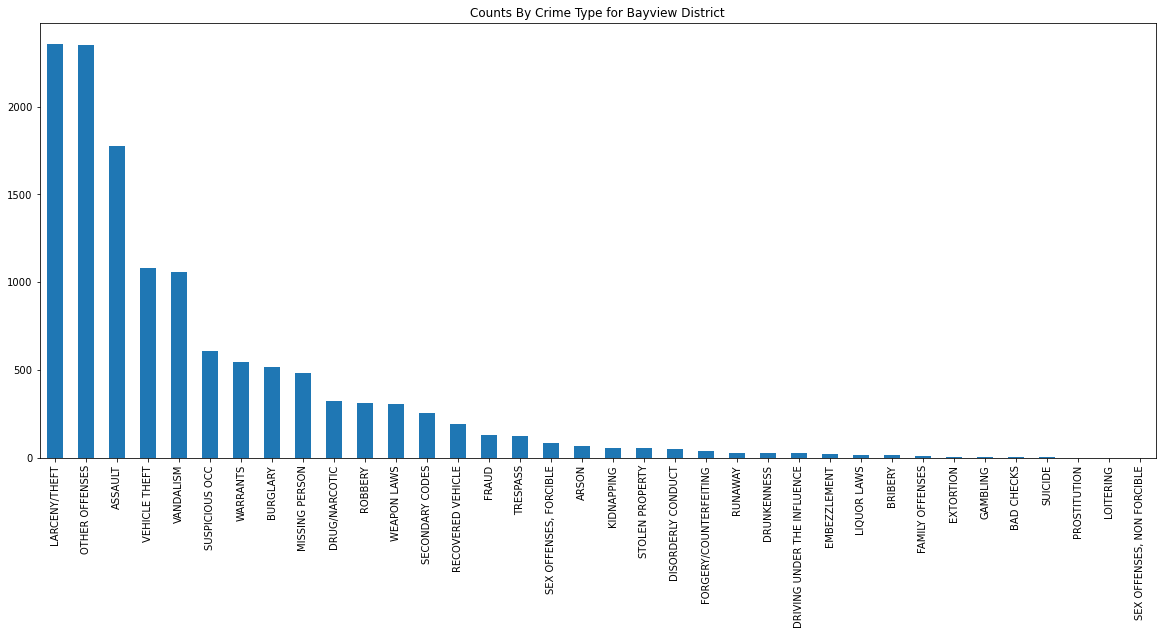

In [55]:
barbayv=allcrimes_bayv_cnt.plot(kind="bar", title="Counts By Crime Type for Bayview District",figsize=(20,8))
plt.savefig("Crime Cat Count Bayview.png")

#### BAR Chart of Resolution Counts by Type for Bayview

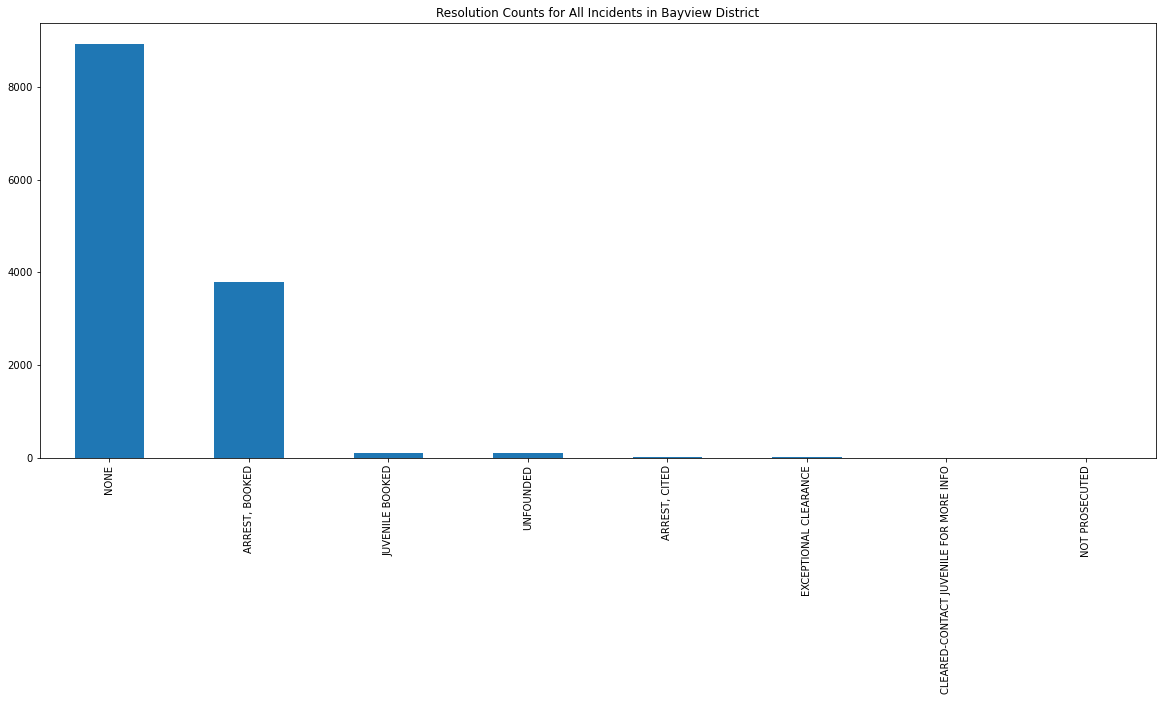

In [56]:
bayvrescnt=bayv_dist_df["Resolution"].value_counts()
barres_bayv=bayvrescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Bayview District",figsize=(20,8))
plt.savefig("Resol Counts Bayview.png")

#### Count of all Crimes by Category for Tenderloin

In [57]:
allcrimes_tend_cnt=tend_dist_df["Category"].value_counts()
allcrimes_tend_cnt

LARCENY/THEFT                  1825
OTHER OFFENSES                 1237
ASSAULT                        1196
DRUG/NARCOTIC                   971
WARRANTS                        739
SUSPICIOUS OCC                  480
ROBBERY                         352
VANDALISM                       339
MISSING PERSON                  170
BURGLARY                        161
VEHICLE THEFT                   153
FRAUD                           150
WEAPON LAWS                     131
TRESPASS                        131
SECONDARY CODES                  99
DISORDERLY CONDUCT               81
STOLEN PROPERTY                  52
FORGERY/COUNTERFEITING           47
RECOVERED VEHICLE                46
SEX OFFENSES, FORCIBLE           44
DRUNKENNESS                      41
EMBEZZLEMENT                     20
PROSTITUTION                     19
KIDNAPPING                       18
ARSON                            13
LIQUOR LAWS                      12
DRIVING UNDER THE INFLUENCE      12
BRIBERY                     

#### Percentage of All Crimes by Category Represented by Tenderloin

In [58]:
tendcntperc=round((allcrimes_tend_cnt/crimecat_cnt)*100,2)
tendcntperc

ARSON                           4.55
ASSAULT                         8.81
BAD CHECKS                       NaN
BRIBERY                         9.09
BURGLARY                        2.77
DISORDERLY CONDUCT             12.31
DRIVING UNDER THE INFLUENCE     3.17
DRUG/NARCOTIC                  22.88
DRUNKENNESS                     8.82
EMBEZZLEMENT                   11.90
EXTORTION                       5.00
FAMILY OFFENSES                 5.66
FORGERY/COUNTERFEITING          7.59
FRAUD                           5.69
GAMBLING                       20.00
KIDNAPPING                      7.00
LARCENY/THEFT                   4.52
LIQUOR LAWS                     7.69
LOITERING                        NaN
MISSING PERSON                  3.92
OTHER OFFENSES                  6.31
PORNOGRAPHY/OBSCENE MAT        50.00
PROSTITUTION                    2.96
RECOVERED VEHICLE               6.25
ROBBERY                        10.67
RUNAWAY                         1.43
SECONDARY CODES                 5.38
S

#### BAR chart of all crimes by category for Tenderloin

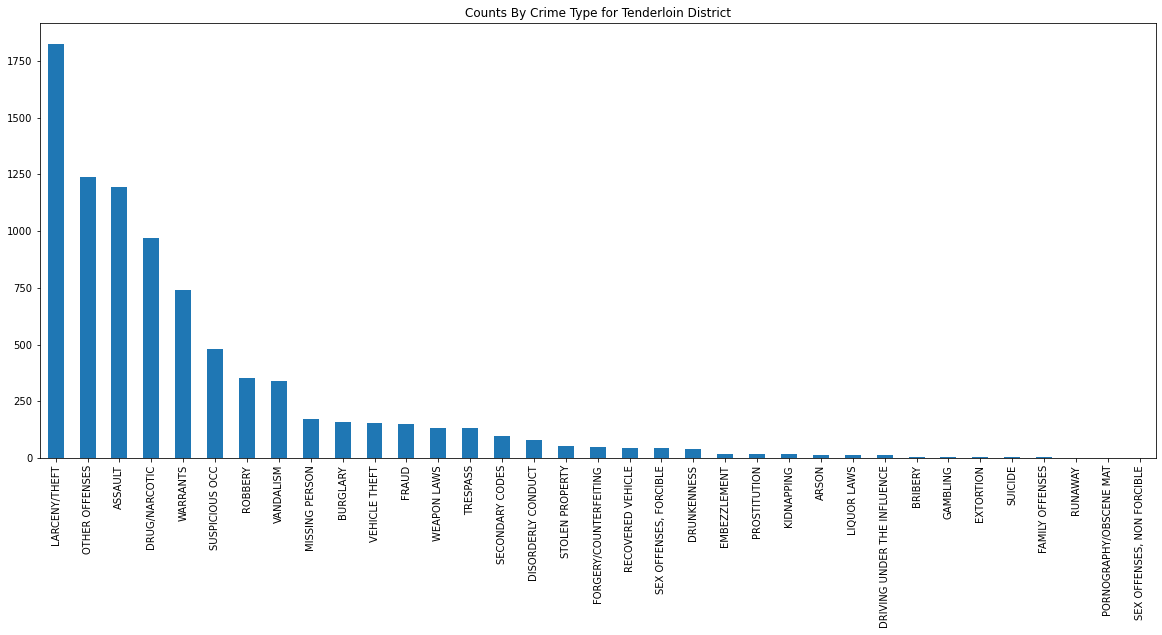

In [59]:
bartend=allcrimes_tend_cnt.plot(kind="bar", title="Counts By Crime Type for Tenderloin District",figsize=(20,8))
plt.savefig("Crime Cat Count Tenderloin.png")

#### BAR Chart of Resolution counts by Type for Tenderloin District

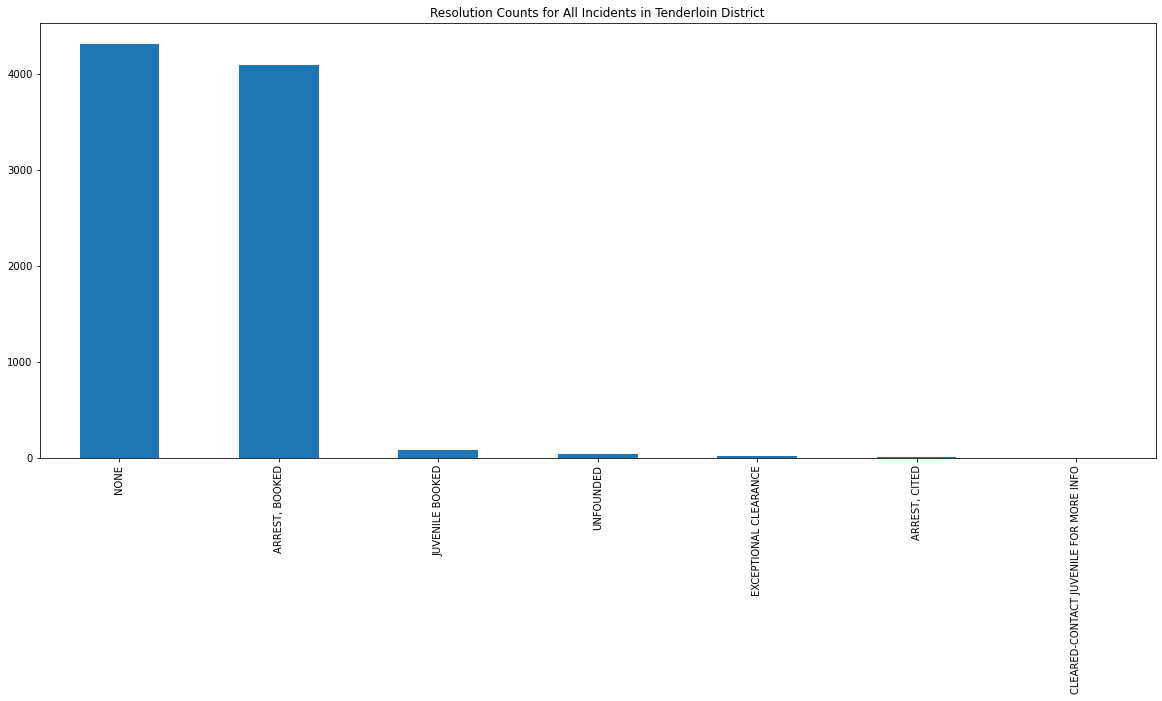

In [60]:
tendrescnt=tend_dist_df["Resolution"].value_counts()
barres_tend=tendrescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Tenderloin District",figsize=(20,8))
plt.savefig("Resol Count Tenderloin.png")

#### Count of crimes by category for Mission

In [61]:
allcrimes_miss_cnt=miss_dist_df["Category"].value_counts()
allcrimes_miss_cnt

LARCENY/THEFT                  3321
OTHER OFFENSES                 2990
ASSAULT                        2110
VANDALISM                      1091
WARRANTS                       1073
SUSPICIOUS OCC                  945
VEHICLE THEFT                   932
BURGLARY                        793
DRUG/NARCOTIC                   639
ROBBERY                         547
MISSING PERSON                  532
TRESPASS                        412
FRAUD                           316
WEAPON LAWS                     278
SECONDARY CODES                 227
SEX OFFENSES, FORCIBLE          180
DISORDERLY CONDUCT              171
STOLEN PROPERTY                 104
DRUNKENNESS                     101
PROSTITUTION                     87
FORGERY/COUNTERFEITING           84
DRIVING UNDER THE INFLUENCE      61
RECOVERED VEHICLE                61
ARSON                            46
KIDNAPPING                       35
LIQUOR LAWS                      30
EMBEZZLEMENT                     24
FAMILY OFFENSES             

#### Percentage of All Crimes by Category Represented by Mission

In [62]:
misscntperc=round((allcrimes_miss_cnt/crimecat_cnt)*100,2)
misscntperc

ARSON                          16.08
ASSAULT                        15.54
BAD CHECKS                      5.88
BRIBERY                        15.15
BURGLARY                       13.67
DISORDERLY CONDUCT             25.99
DRIVING UNDER THE INFLUENCE    16.14
DRUG/NARCOTIC                  15.06
DRUNKENNESS                    21.72
EMBEZZLEMENT                   14.29
EXTORTION                      11.67
FAMILY OFFENSES                26.42
FORGERY/COUNTERFEITING         13.57
FRAUD                          11.99
GAMBLING                       10.00
KIDNAPPING                     13.62
LARCENY/THEFT                   8.22
LIQUOR LAWS                    19.23
LOITERING                      14.29
MISSING PERSON                 12.26
OTHER OFFENSES                 15.26
PORNOGRAPHY/OBSCENE MAT          NaN
PROSTITUTION                   13.57
RECOVERED VEHICLE               8.29
ROBBERY                        16.58
RUNAWAY                         3.57
SECONDARY CODES                12.33
S

#### BAR chart of criumes by category for Mission

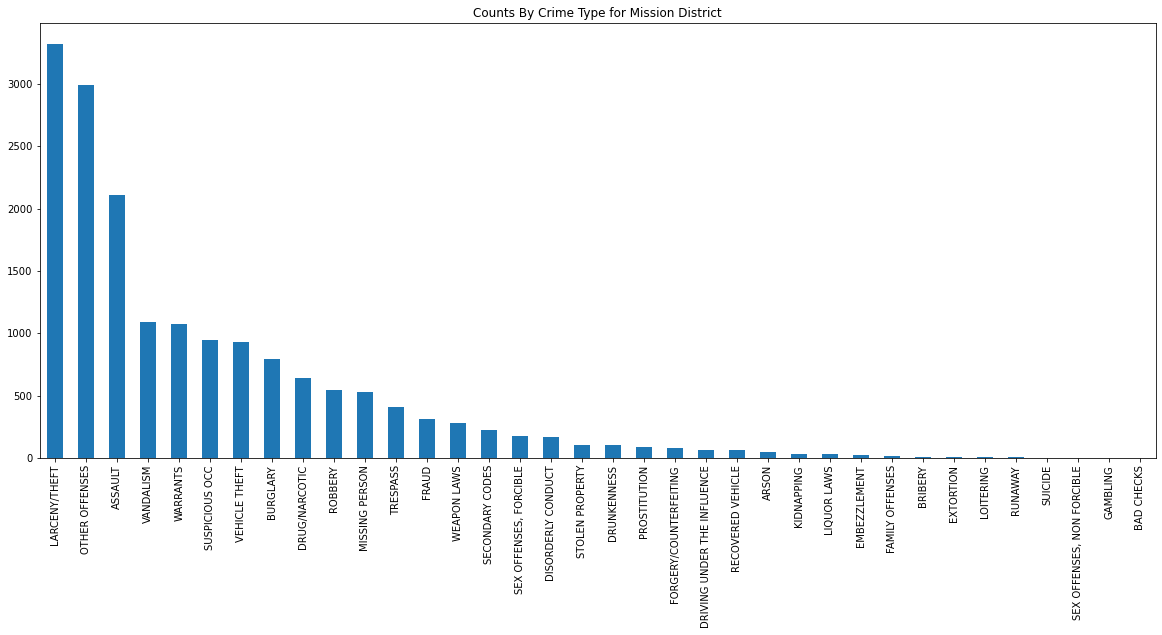

In [63]:
barmiss=allcrimes_miss_cnt.plot(kind="bar", title="Counts By Crime Type for Mission District",figsize=(20,8))
plt.savefig("Crime Cat Count Mission.png")

#### BAR Cahrt of Resolution Counts by Type for Mission District

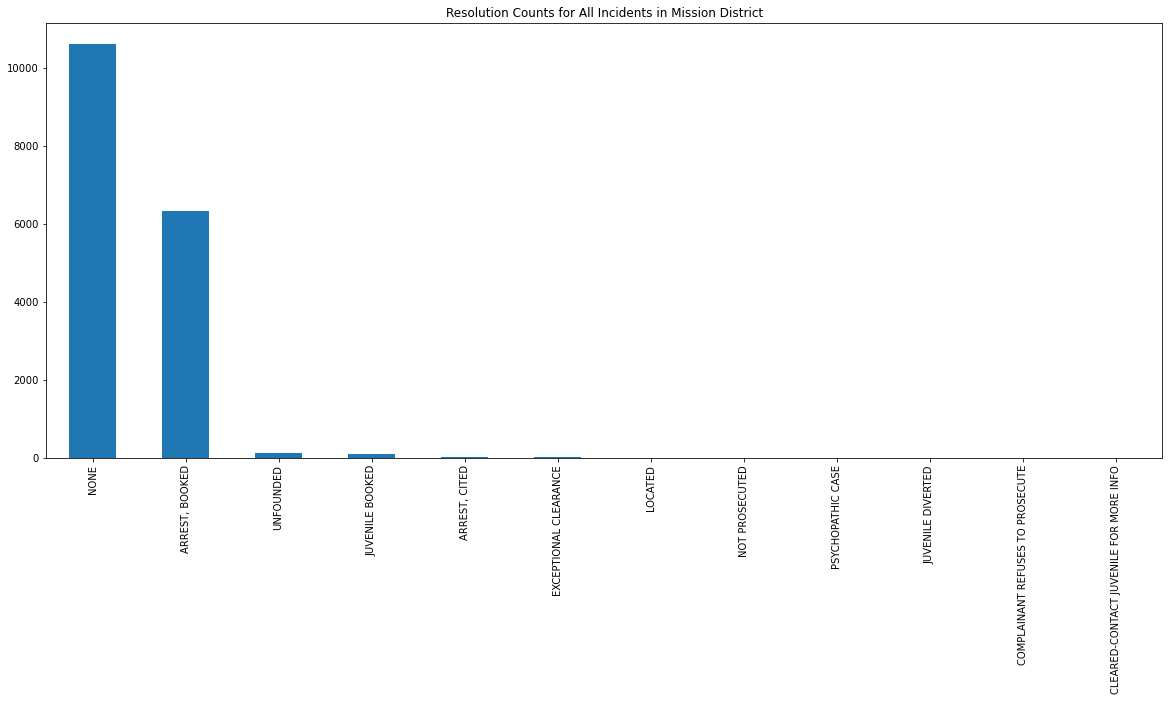

In [64]:
missrescnt=miss_dist_df["Resolution"].value_counts()
barres_miss=missrescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Mission District",figsize=(20,8))
plt.savefig("Resol Count Mission.png")

#### Count of all crimes by caetgory for Northern

In [65]:
allcrimes_nort_cnt=nort_dist_df["Category"].value_counts()
allcrimes_nort_cnt

LARCENY/THEFT                  7219
OTHER OFFENSES                 2219
ASSAULT                        1536
VANDALISM                      1199
BURGLARY                        803
VEHICLE THEFT                   739
WARRANTS                        624
SUSPICIOUS OCC                  600
DRUG/NARCOTIC                   527
MISSING PERSON                  398
ROBBERY                         388
FRAUD                           365
TRESPASS                        268
SECONDARY CODES                 193
WEAPON LAWS                     131
DISORDERLY CONDUCT              124
STOLEN PROPERTY                 123
PROSTITUTION                    111
SEX OFFENSES, FORCIBLE           96
FORGERY/COUNTERFEITING           93
RECOVERED VEHICLE                70
DRUNKENNESS                      59
DRIVING UNDER THE INFLUENCE      41
ARSON                            27
KIDNAPPING                       23
SUICIDE                          14
LIQUOR LAWS                      13
LOITERING                   

#### Percent of all Crimes by Category Represented by Northern

In [66]:
nortcntperc=round((allcrimes_nort_cnt/crimecat_cnt)*100,2)
nortcntperc

ARSON                           9.44
ASSAULT                        11.31
BAD CHECKS                     11.76
BRIBERY                         6.06
BURGLARY                       13.84
DISORDERLY CONDUCT             18.84
DRIVING UNDER THE INFLUENCE    10.85
DRUG/NARCOTIC                  12.42
DRUNKENNESS                    12.69
EMBEZZLEMENT                    5.36
EXTORTION                       1.67
FAMILY OFFENSES                 9.43
FORGERY/COUNTERFEITING         15.02
FRAUD                          13.85
GAMBLING                         NaN
KIDNAPPING                      8.95
LARCENY/THEFT                  17.86
LIQUOR LAWS                     8.33
LOITERING                      23.81
MISSING PERSON                  9.17
OTHER OFFENSES                 11.32
PORNOGRAPHY/OBSCENE MAT          NaN
PROSTITUTION                   17.32
RECOVERED VEHICLE               9.51
ROBBERY                        11.76
RUNAWAY                         5.71
SECONDARY CODES                10.48
S

#### BAR Chart of crimes by category for Northern

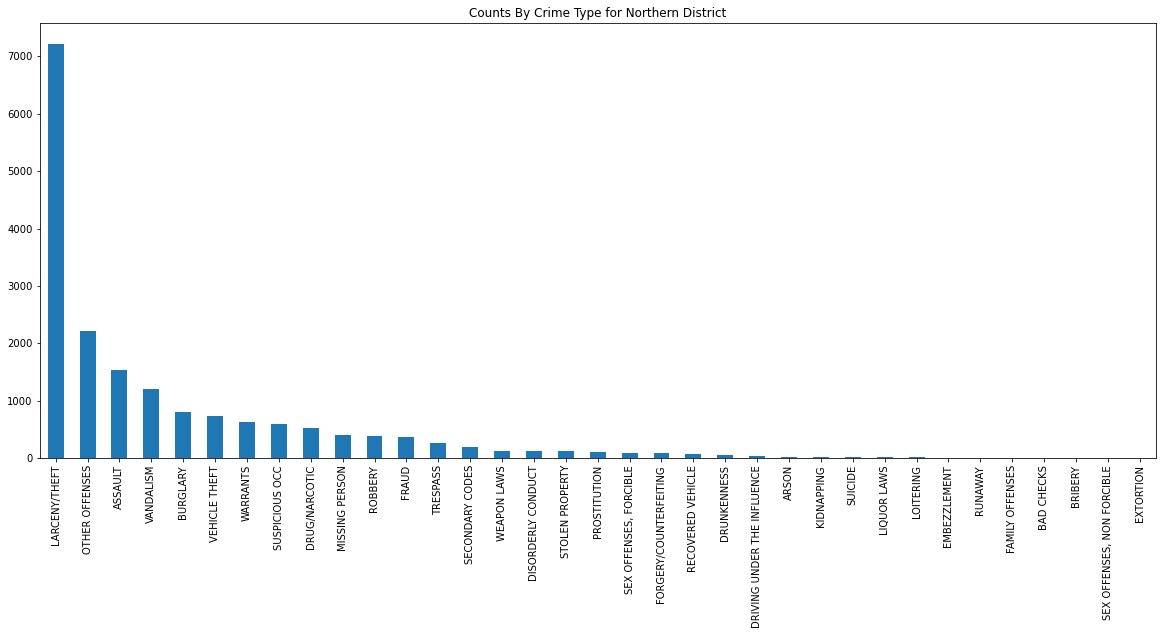

In [67]:
barnort=allcrimes_nort_cnt.plot(kind="bar", title="Counts By Crime Type for Northern District",figsize=(20,8))
plt.savefig("Crime Cat Count Northern.png")

#### BAR Chart of Resolution Counts by Type for Northern District

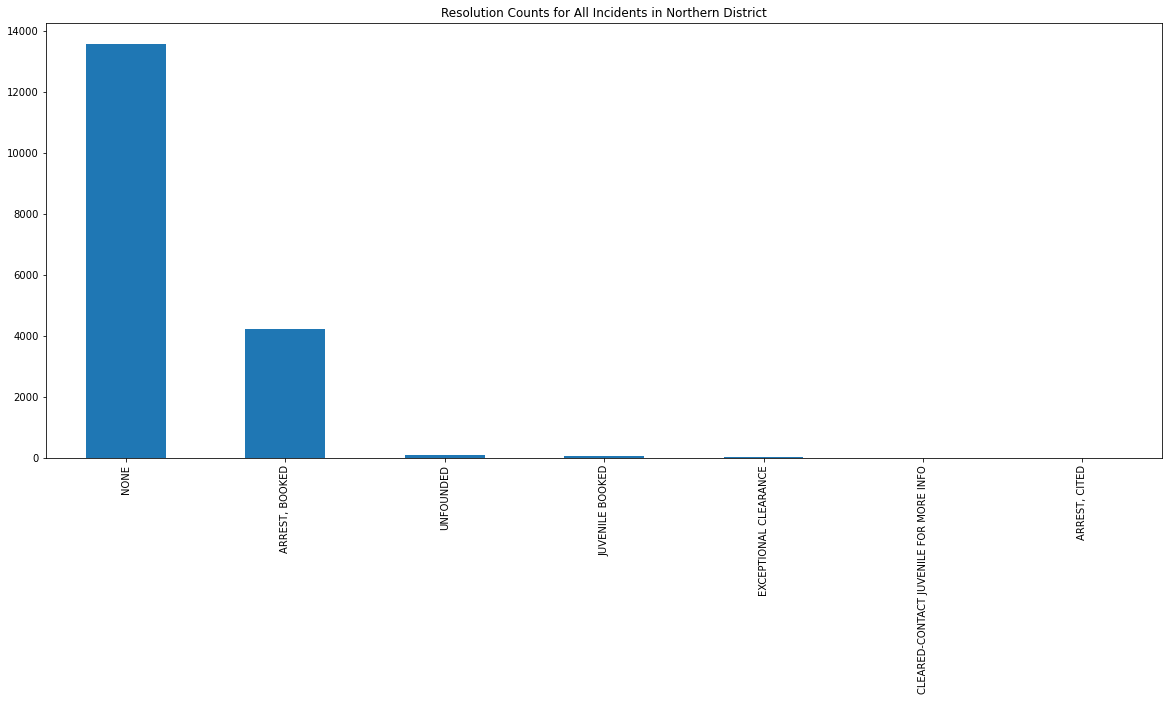

In [68]:
nortrescnt=nort_dist_df["Resolution"].value_counts()
barres_nort=nortrescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Northern District",figsize=(20,8))
plt.savefig("Resol Count Northern.png")

#### Count of crimes by category for Taraval

In [69]:
allcrimes_tara_cnt=tara_dist_df["Category"].value_counts()
allcrimes_tara_cnt

LARCENY/THEFT                  2605
OTHER OFFENSES                 1751
ASSAULT                         918
BURGLARY                        695
VANDALISM                       622
VEHICLE THEFT                   538
SUSPICIOUS OCC                  451
MISSING PERSON                  439
FRAUD                           278
WARRANTS                        273
SECONDARY CODES                 232
ROBBERY                         180
PROSTITUTION                    116
TRESPASS                        110
DRUG/NARCOTIC                   108
WEAPON LAWS                     106
SEX OFFENSES, FORCIBLE           82
STOLEN PROPERTY                  52
DRUNKENNESS                      49
RECOVERED VEHICLE                48
DRIVING UNDER THE INFLUENCE      47
FORGERY/COUNTERFEITING           37
RUNAWAY                          27
LIQUOR LAWS                      20
KIDNAPPING                       18
DISORDERLY CONDUCT               18
ARSON                            18
EMBEZZLEMENT                

#### Percentage of All Crimes by Category Represneted by Taraval

In [70]:
taracntperc=round((allcrimes_tara_cnt/crimecat_cnt)*100,2)
taracntperc

ARSON                           6.29
ASSAULT                         6.76
BAD CHECKS                     17.65
BRIBERY                         6.06
BURGLARY                       11.98
DISORDERLY CONDUCT              2.74
DRIVING UNDER THE INFLUENCE    12.43
DRUG/NARCOTIC                   2.55
DRUNKENNESS                    10.54
EMBEZZLEMENT                    9.52
EXTORTION                      16.67
FAMILY OFFENSES                11.32
FORGERY/COUNTERFEITING          5.98
FRAUD                          10.55
GAMBLING                         NaN
KIDNAPPING                      7.00
LARCENY/THEFT                   6.45
LIQUOR LAWS                    12.82
LOITERING                       2.38
MISSING PERSON                 10.12
OTHER OFFENSES                  8.93
PORNOGRAPHY/OBSCENE MAT        25.00
PROSTITUTION                   18.10
RECOVERED VEHICLE               6.52
ROBBERY                         5.46
RUNAWAY                        19.29
SECONDARY CODES                12.60
S

#### BAR Chart of crimes by category for Taraval

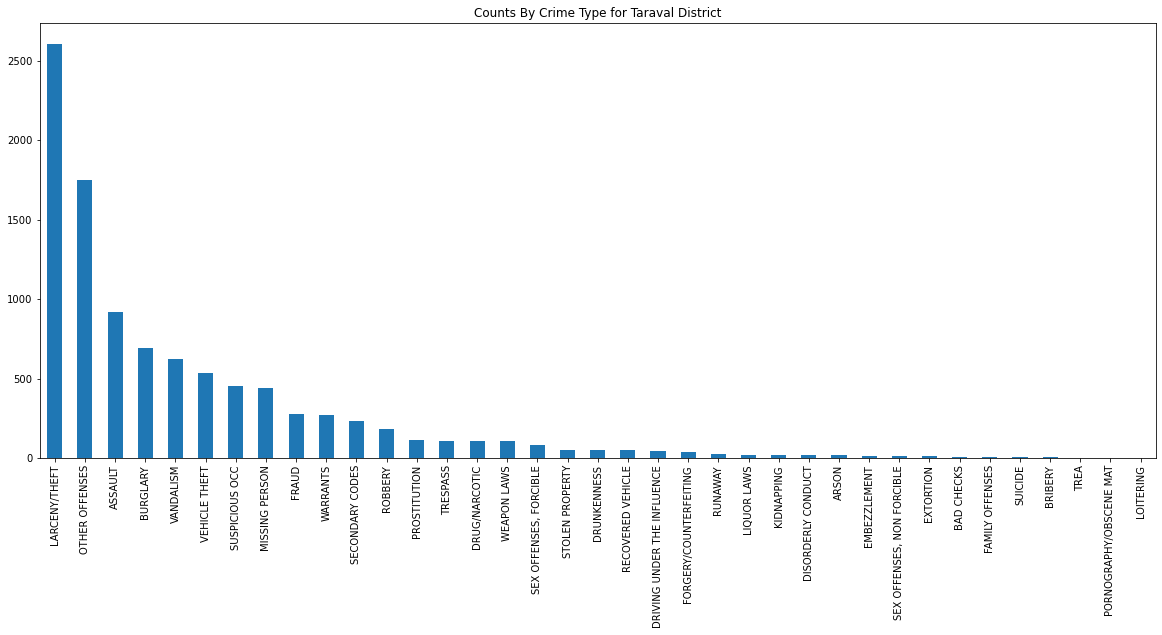

In [71]:
bartara=allcrimes_tara_cnt.plot(kind="bar", title="Counts By Crime Type for Taraval District",figsize=(20,8))
plt.savefig("Crime Cat Count Taraval.png")

#### Resolution Counts by Type for Taraval District

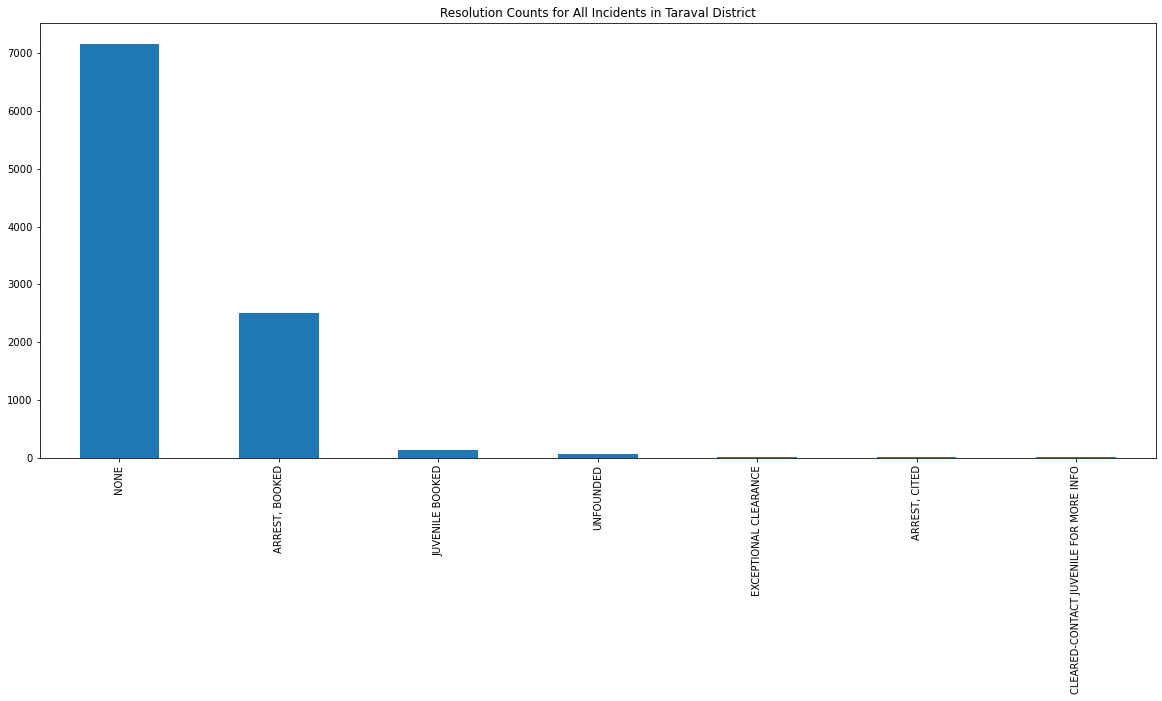

In [72]:
tararescnt=tara_dist_df["Resolution"].value_counts()
barres_tara=tararescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Taraval District",figsize=(20,8))
plt.savefig("Resol Count Taraval.png")

#### Count of crimes by catefgory for Ingleside

In [73]:
allcrimes_ingl_cnt=ingl_dist_df["Category"].value_counts()
allcrimes_ingl_cnt

OTHER OFFENSES                 1867
LARCENY/THEFT                  1781
ASSAULT                        1506
VEHICLE THEFT                   915
VANDALISM                       761
MISSING PERSON                  536
BURGLARY                        534
SUSPICIOUS OCC                  527
ROBBERY                         313
WARRANTS                        307
SECONDARY CODES                 233
DRUG/NARCOTIC                   191
WEAPON LAWS                     157
FRAUD                           146
RECOVERED VEHICLE               103
SEX OFFENSES, FORCIBLE           88
TRESPASS                         74
STOLEN PROPERTY                  56
FORGERY/COUNTERFEITING           43
KIDNAPPING                       39
DRIVING UNDER THE INFLUENCE      32
ARSON                            22
DRUNKENNESS                      18
SUICIDE                          16
DISORDERLY CONDUCT               14
RUNAWAY                          13
LIQUOR LAWS                      13
BRIBERY                     

#### Percentage of All Crimes By Category Represneted by Ingleside

In [74]:
inglcntperc=round((allcrimes_ingl_cnt/crimecat_cnt)*100,2)
inglcntperc

ARSON                           7.69
ASSAULT                        11.09
BAD CHECKS                      5.88
BRIBERY                        12.12
BURGLARY                        9.20
DISORDERLY CONDUCT              2.13
DRIVING UNDER THE INFLUENCE     8.47
DRUG/NARCOTIC                   4.50
DRUNKENNESS                     3.87
EMBEZZLEMENT                    4.17
EXTORTION                      13.33
FAMILY OFFENSES                13.21
FORGERY/COUNTERFEITING          6.95
FRAUD                           5.54
GAMBLING                       25.00
KIDNAPPING                     15.18
LARCENY/THEFT                   4.41
LIQUOR LAWS                     8.33
LOITERING                       7.14
MISSING PERSON                 12.36
OTHER OFFENSES                  9.53
PORNOGRAPHY/OBSCENE MAT        25.00
PROSTITUTION                    1.25
RECOVERED VEHICLE              13.99
ROBBERY                         9.49
RUNAWAY                         9.29
SECONDARY CODES                12.66
S

#### Bar Chart of crimes by category for Ingleside

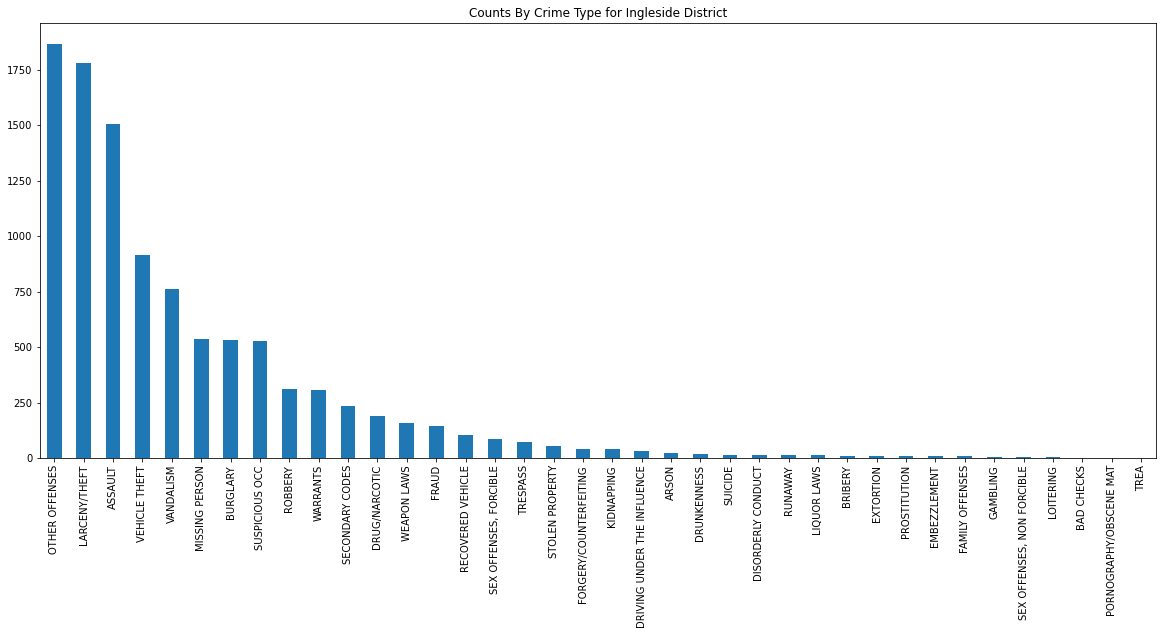

In [75]:
baringl=allcrimes_ingl_cnt.plot(kind="bar", title="Counts By Crime Type for Ingleside District",figsize=(20,8))
plt.savefig("Crime Cat Count Ingleside.png")

#### Resolution Counts by Type for Ingleside District

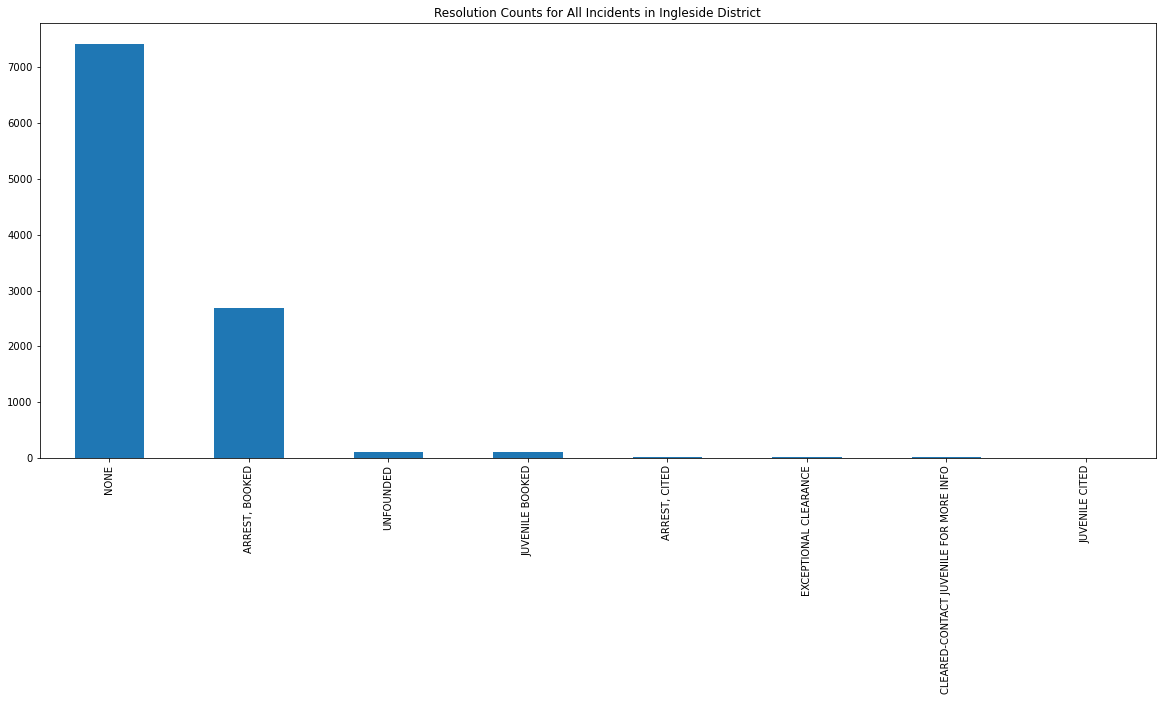

In [76]:
inglrescnt=ingl_dist_df["Resolution"].value_counts()
barres_ingl=inglrescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Ingleside District",figsize=(20,8))
plt.savefig("Resol Count Ingleside.png")

#### Count of crimes by category for Central

In [77]:
allcrimes_cent_cnt=cent_dist_df["Category"].value_counts()
allcrimes_cent_cnt

LARCENY/THEFT                  6740
OTHER OFFENSES                 1737
ASSAULT                        1187
VANDALISM                      1148
BURGLARY                        645
SUSPICIOUS OCC                  580
WARRANTS                        489
VEHICLE THEFT                   481
FRAUD                           406
ROBBERY                         395
MISSING PERSON                  288
DRUG/NARCOTIC                   207
TRESPASS                        173
STOLEN PROPERTY                 156
SECONDARY CODES                 138
WEAPON LAWS                     122
SEX OFFENSES, FORCIBLE           87
FORGERY/COUNTERFEITING           82
DRUNKENNESS                      52
RECOVERED VEHICLE                39
DISORDERLY CONDUCT               32
DRIVING UNDER THE INFLUENCE      31
ARSON                            29
PROSTITUTION                     28
EMBEZZLEMENT                     21
KIDNAPPING                       13
LOITERING                        10
SUICIDE                     

#### Percentage of All Crimes b y Category Represented by Central

In [78]:
centcntperc=round((allcrimes_cent_cnt/crimecat_cnt)*100,2)
centcntperc

ARSON                          10.14
ASSAULT                         8.74
BAD CHECKS                      8.82
BRIBERY                         4.55
BURGLARY                       11.12
DISORDERLY CONDUCT              4.86
DRIVING UNDER THE INFLUENCE     8.20
DRUG/NARCOTIC                   4.88
DRUNKENNESS                    11.18
EMBEZZLEMENT                   12.50
EXTORTION                      10.00
FAMILY OFFENSES                 1.89
FORGERY/COUNTERFEITING         13.25
FRAUD                          15.41
GAMBLING                        5.00
KIDNAPPING                      5.06
LARCENY/THEFT                  16.68
LIQUOR LAWS                     6.41
LOITERING                      23.81
MISSING PERSON                  6.64
OTHER OFFENSES                  8.86
PORNOGRAPHY/OBSCENE MAT          NaN
PROSTITUTION                    4.37
RECOVERED VEHICLE               5.30
ROBBERY                        11.97
RUNAWAY                         4.29
SECONDARY CODES                 7.50
S

#### BAR Chart of crimes by category for central

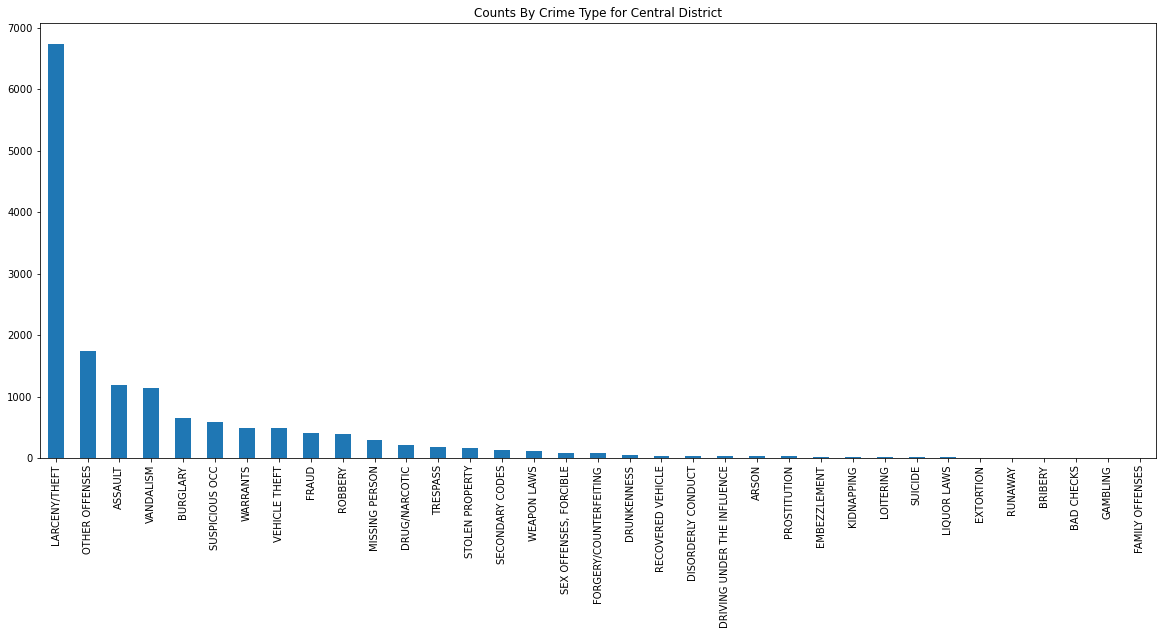

In [79]:
barcent=allcrimes_cent_cnt.plot(kind="bar", title="Counts By Crime Type for Central District",figsize=(20,8))
plt.savefig("Crime Cat Count Central.png")

#### Resolutioon Counts by Type for Central

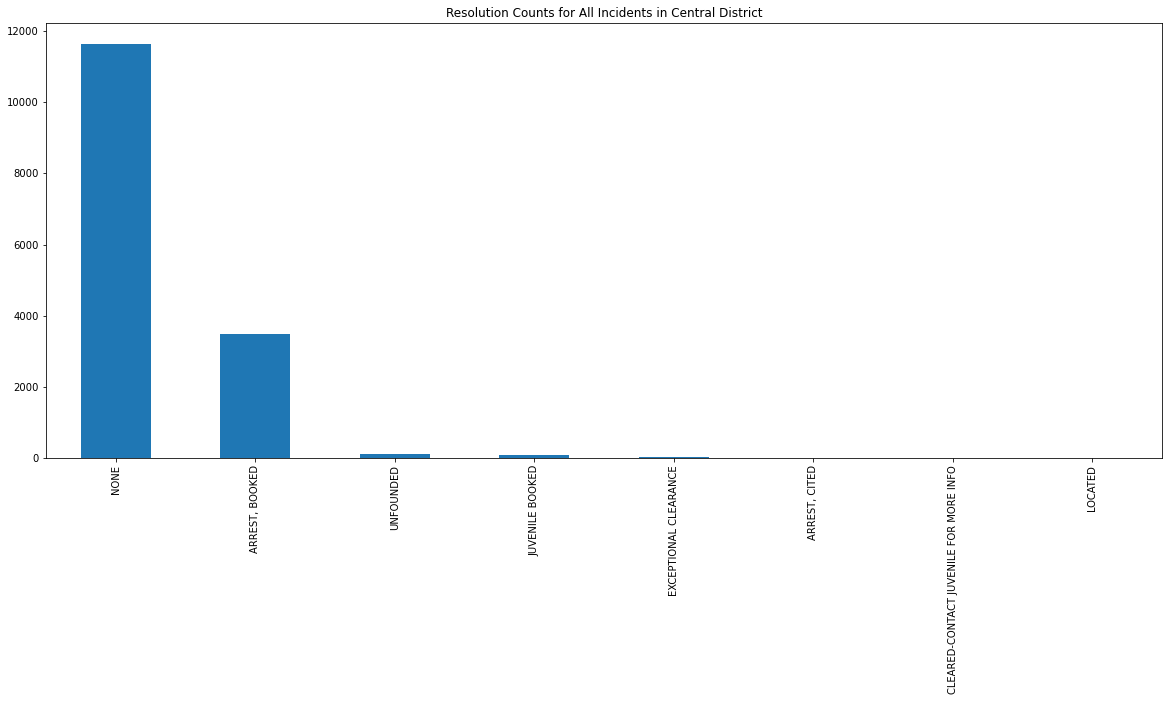

In [80]:
centrescnt=cent_dist_df["Resolution"].value_counts()
barres_cent=centrescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Central District",figsize=(20,8))
plt.savefig("Resol Cat Count Central.png")

#### Count of crimes by category for Richmond

In [81]:
allcrimes_rich_cnt=rich_dist_df["Category"].value_counts()
allcrimes_rich_cnt

LARCENY/THEFT                  3133
OTHER OFFENSES                 1022
VEHICLE THEFT                   515
VANDALISM                       477
ASSAULT                         473
BURGLARY                        395
SUSPICIOUS OCC                  358
MISSING PERSON                  229
FRAUD                           202
WARRANTS                        175
SECONDARY CODES                 117
ROBBERY                         101
DRUG/NARCOTIC                    76
WEAPON LAWS                      56
TRESPASS                         49
STOLEN PROPERTY                  48
FORGERY/COUNTERFEITING           45
SEX OFFENSES, FORCIBLE           40
RECOVERED VEHICLE                35
DRIVING UNDER THE INFLUENCE      34
DRUNKENNESS                      17
ARSON                            14
KIDNAPPING                        9
DISORDERLY CONDUCT                9
RUNAWAY                           8
LIQUOR LAWS                       8
BAD CHECKS                        5
EXTORTION                   

#### Percentage of Alll crimes By Category Represenetd by Richmond

In [82]:
richcntperc=round((allcrimes_rich_cnt/crimecat_cnt)*100,2)
richcntperc

ARSON                           4.90
ASSAULT                         3.48
BAD CHECKS                     14.71
BRIBERY                         3.03
BURGLARY                        6.81
DISORDERLY CONDUCT              1.37
DRIVING UNDER THE INFLUENCE     8.99
DRUG/NARCOTIC                   1.79
DRUNKENNESS                     3.66
EMBEZZLEMENT                    2.38
EXTORTION                       8.33
FAMILY OFFENSES                 5.66
FORGERY/COUNTERFEITING          7.27
FRAUD                           7.67
GAMBLING                         NaN
KIDNAPPING                      3.50
LARCENY/THEFT                   7.75
LIQUOR LAWS                     5.13
LOITERING                       2.38
MISSING PERSON                  5.28
OTHER OFFENSES                  5.21
PORNOGRAPHY/OBSCENE MAT          NaN
PROSTITUTION                    0.78
RECOVERED VEHICLE               4.76
ROBBERY                         3.06
RUNAWAY                         5.71
SECONDARY CODES                 6.36
S

#### BAR Chart of crime by category for Richmond

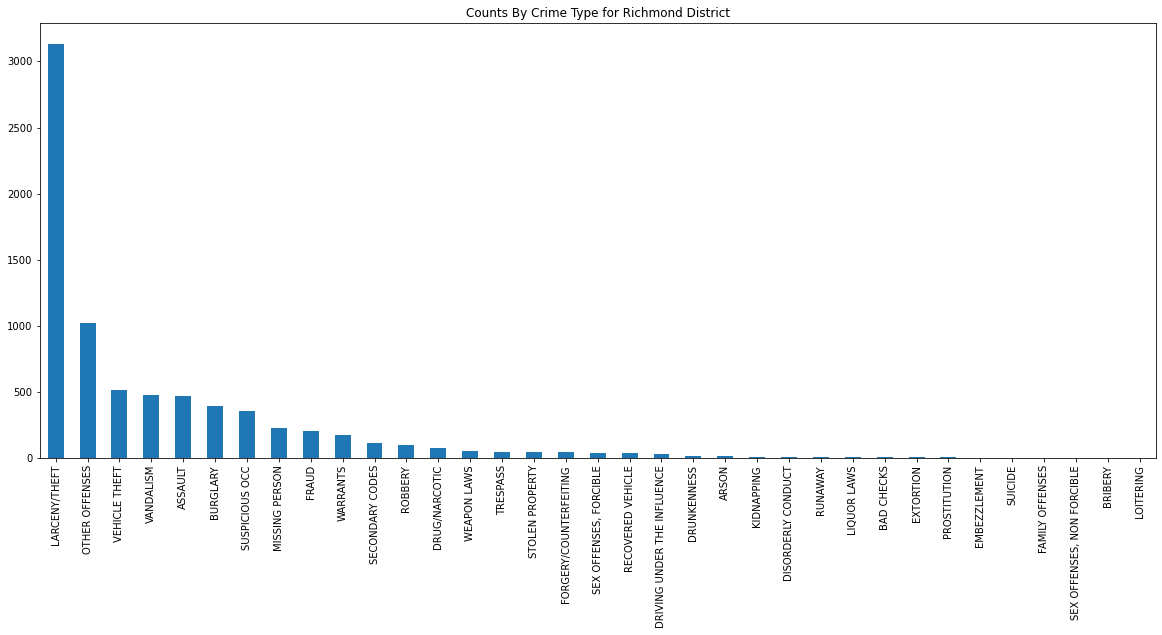

In [83]:
barrich=allcrimes_rich_cnt.plot(kind="bar", title="Counts By Crime Type for Richmond District",figsize=(20,8))
plt.savefig("Crime Cat Count Richmond.png")

#### Resolution Counts by Type for Richmond

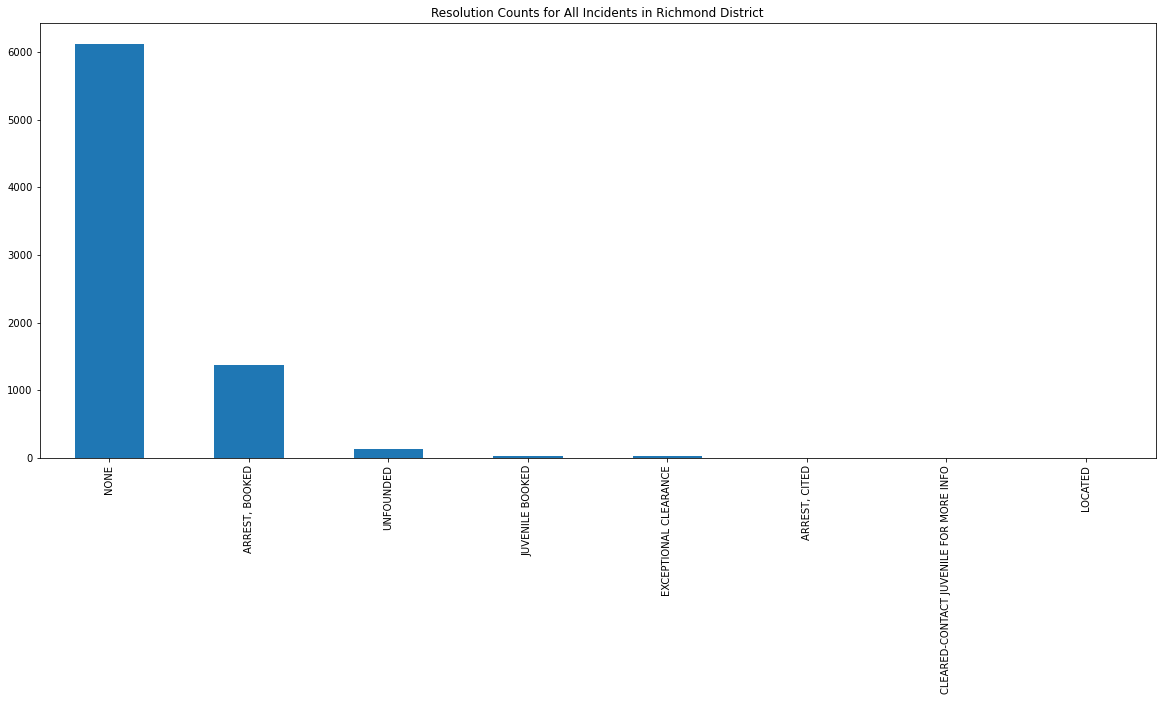

In [84]:
richrescnt=rich_dist_df["Resolution"].value_counts()
barres_rich=richrescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Richmond District",figsize=(20,8))
plt.savefig("Resol Count Richmond.png")

#### Count of crime by categfory for Park

In [85]:
allcrimes_park_cnt=park_dist_df["Category"].value_counts()
allcrimes_park_cnt

LARCENY/THEFT                  2224
OTHER OFFENSES                 1087
MISSING PERSON                  645
ASSAULT                         524
VANDALISM                       454
VEHICLE THEFT                   452
BURGLARY                        413
WARRANTS                        319
DRUG/NARCOTIC                   274
SUSPICIOUS OCC                  269
FRAUD                           158
ROBBERY                         121
SECONDARY CODES                  93
TRESPASS                         79
WEAPON LAWS                      65
SEX OFFENSES, FORCIBLE           51
STOLEN PROPERTY                  37
RUNAWAY                          31
RECOVERED VEHICLE                29
DRIVING UNDER THE INFLUENCE      27
FORGERY/COUNTERFEITING           21
DISORDERLY CONDUCT               18
DRUNKENNESS                      13
ARSON                            13
LIQUOR LAWS                      10
KIDNAPPING                        8
SUICIDE                           5
EXTORTION                   

#### Percentage of All Crimes by Category Represented by Park

In [86]:
parkcntperc=round((allcrimes_park_cnt/crimecat_cnt)*100,2)
parkcntperc

ARSON                           4.55
ASSAULT                         3.86
BAD CHECKS                      5.88
BRIBERY                         1.52
BURGLARY                        7.12
DISORDERLY CONDUCT              2.74
DRIVING UNDER THE INFLUENCE     7.14
DRUG/NARCOTIC                   6.46
DRUNKENNESS                     2.80
EMBEZZLEMENT                    2.38
EXTORTION                       6.67
FAMILY OFFENSES                  NaN
FORGERY/COUNTERFEITING          3.39
FRAUD                           6.00
GAMBLING                         NaN
KIDNAPPING                      3.11
LARCENY/THEFT                   5.50
LIQUOR LAWS                     6.41
LOITERING                        NaN
MISSING PERSON                 14.87
OTHER OFFENSES                  5.55
PORNOGRAPHY/OBSCENE MAT          NaN
PROSTITUTION                    0.31
RECOVERED VEHICLE               3.94
ROBBERY                         3.67
RUNAWAY                        22.14
SECONDARY CODES                 5.05
S

#### BAR Chart of crime by category for Park

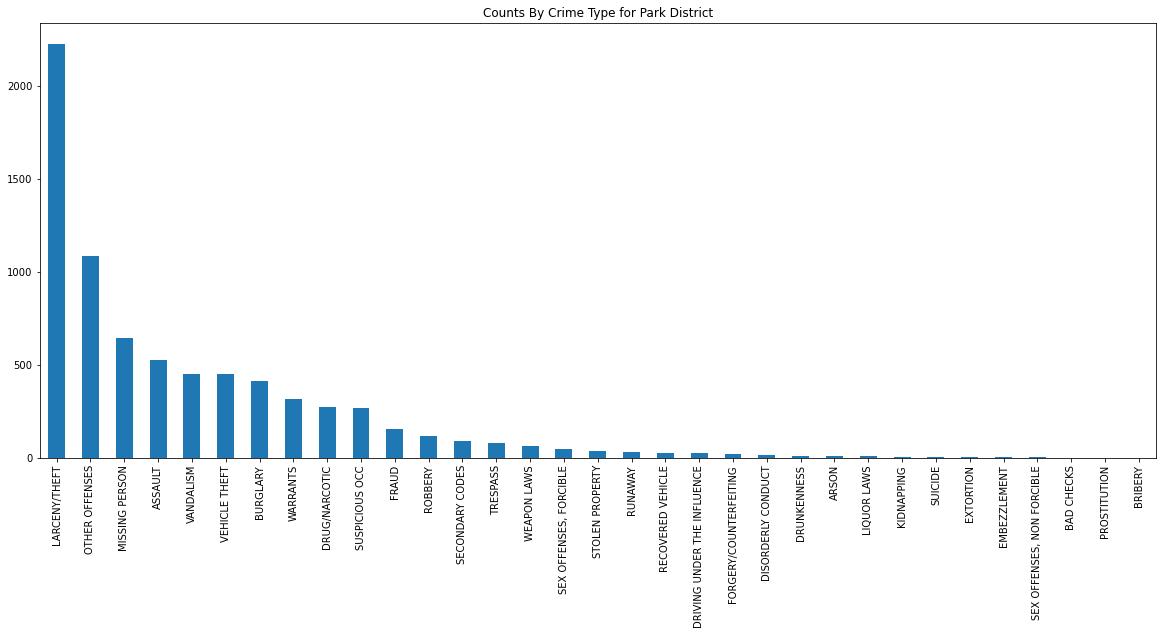

In [87]:
barpark=allcrimes_park_cnt.plot(kind="bar", title="Counts By Crime Type for Park District",figsize=(20,8))
plt.savefig("Crime Cat Count Park.png")

#### Resolution Count by Type for Park

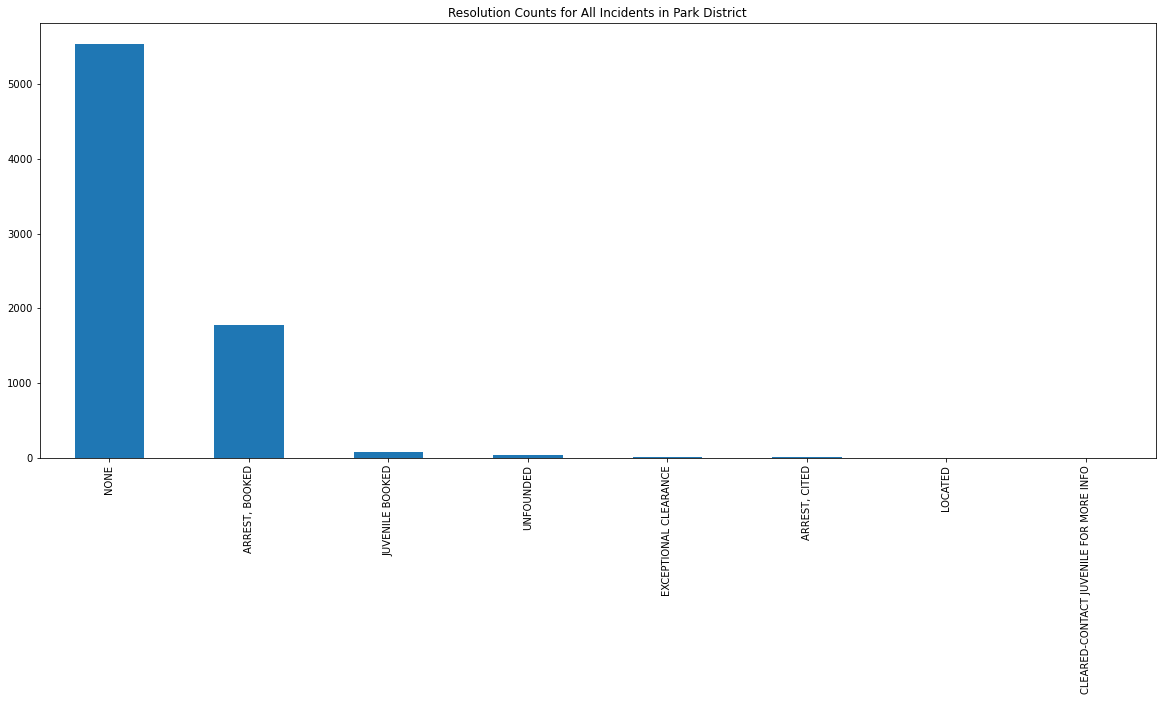

In [88]:
parkrescnt=park_dist_df["Resolution"].value_counts()
barres_park=parkrescnt.plot(kind="bar", title="Resolution Counts for All Incidents in Park District",figsize=(20,8))
plt.savefig("Resol Count Park.png")

#### Experment: Returning the Value for a Particular Category from a Series of Count by Category 

In [89]:
test=allcrimes_park_cnt["ASSAULT"]
test

524

#### Dataframe Containg Percentages of All Crime Categories by District

In [99]:
distperccat_df=pd.concat([soutcntperc, bayvcntperc, tendcntperc, misscntperc, nortcntperc, taracntperc, inglcntperc, centcntperc, richcntperc, parkcntperc], axis=1)
distperccat_df.columns=["Southern", "Bayview", "Tenderloin", "Mission", "Northern", "Taraval", "Ingleside", "Central", "Richmond", "Park"]
distperccat_df.to_excel("Perc all Cat by District.xlsx")
distperccat_df

FileCreateError: [Errno 13] Permission denied: 'Perc all Cat by District.xlsx'

In [118]:
distperccat_sort=distperccat_df.sort_values(by=["Southern", "Mission","Bayview","Northern","Taraval", "Ingleside","Central","Tenderloin","Park","Richmond"], ascending=False)
distperccat_sort

,Southern,Bayview,Tenderloin,Mission,Northern,Taraval,Ingleside,Central,Richmond,Park
PROSTITUTION,40.87,0.47,2.96,13.57,17.32,18.10,1.25,4.37,0.78,0.31
TREA,33.33,NaN,NaN,NaN,NaN,33.33,33.33,NaN,NaN,NaN
EMBEZZLEMENT,23.81,13.69,11.90,14.29,5.36,9.52,4.17,12.50,2.38,2.38
WARRANTS,23.11,9.27,12.50,18.14,10.55,4.62,5.19,8.27,2.96,5.39
LARCENY/THEFT,22.77,5.83,4.52,8.22,17.86,6.45,4.41,16.68,7.75,5.50
"SEX OFFENSES, NON FORCIBLE",22.50,5.00,2.50,7.50,7.50,35.00,7.50,NaN,5.00,7.50
STOLEN PROPERTY,22.11,6.69,5.90,11.79,13.95,5.90,6.35,17.69,5.44,4.20
DRUG/NARCOTIC,21.75,7.71,22.88,15.06,12.42,2.55,4.50,4.88,1.79,6.46
DISORDERLY CONDUCT,21.58,7.45,12.31,25.99,18.84,2.74,2.13,4.86,1.37,2.74
TRESPASS,21.58,6.90,7.23,22.74,14.79,6.07,4.08,9.55,2.70,4.36


In [121]:
distperccatsort_head=distperccat_sort.head(15)
distperccatsort_head

,Southern,Bayview,Tenderloin,Mission,Northern,Taraval,Ingleside,Central,Richmond,Park
PROSTITUTION,40.87,0.47,2.96,13.57,17.32,18.10,1.25,4.37,0.78,0.31
TREA,33.33,NaN,NaN,NaN,NaN,33.33,33.33,NaN,NaN,NaN
EMBEZZLEMENT,23.81,13.69,11.90,14.29,5.36,9.52,4.17,12.50,2.38,2.38
WARRANTS,23.11,9.27,12.50,18.14,10.55,4.62,5.19,8.27,2.96,5.39
LARCENY/THEFT,22.77,5.83,4.52,8.22,17.86,6.45,4.41,16.68,7.75,5.50
"SEX OFFENSES, NON FORCIBLE",22.50,5.00,2.50,7.50,7.50,35.00,7.50,NaN,5.00,7.50
STOLEN PROPERTY,22.11,6.69,5.90,11.79,13.95,5.90,6.35,17.69,5.44,4.20
DRUG/NARCOTIC,21.75,7.71,22.88,15.06,12.42,2.55,4.50,4.88,1.79,6.46
DISORDERLY CONDUCT,21.58,7.45,12.31,25.99,18.84,2.74,2.13,4.86,1.37,2.74
TRESPASS,21.58,6.90,7.23,22.74,14.79,6.07,4.08,9.55,2.70,4.36


#### STACKED BAR Chart of Percentages of Crime Categories by District

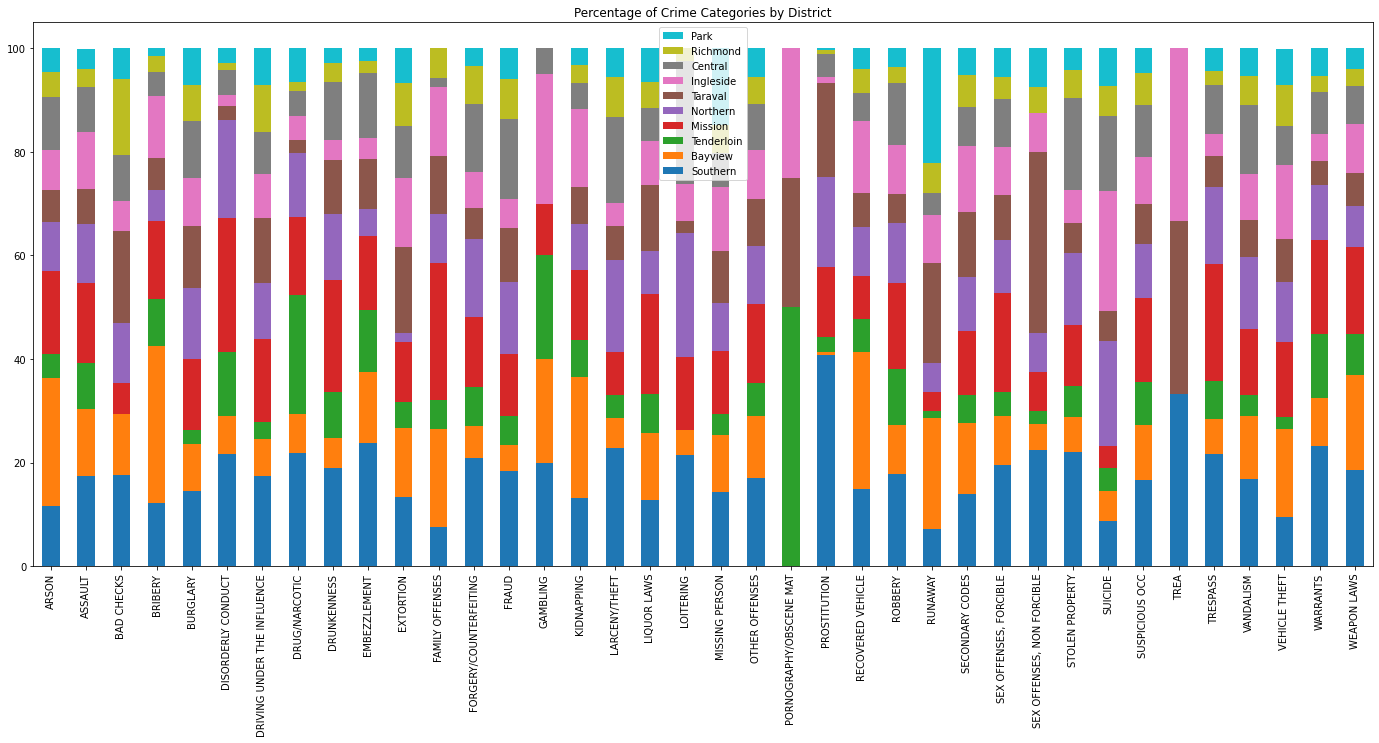

In [111]:
distperccat_df.plot(kind="bar", stacked=True, figsize=(24, 10),title="Percentage of Crime Categories by District", legend="reverse")
plt.savefig("District Percent Crime Types.png")


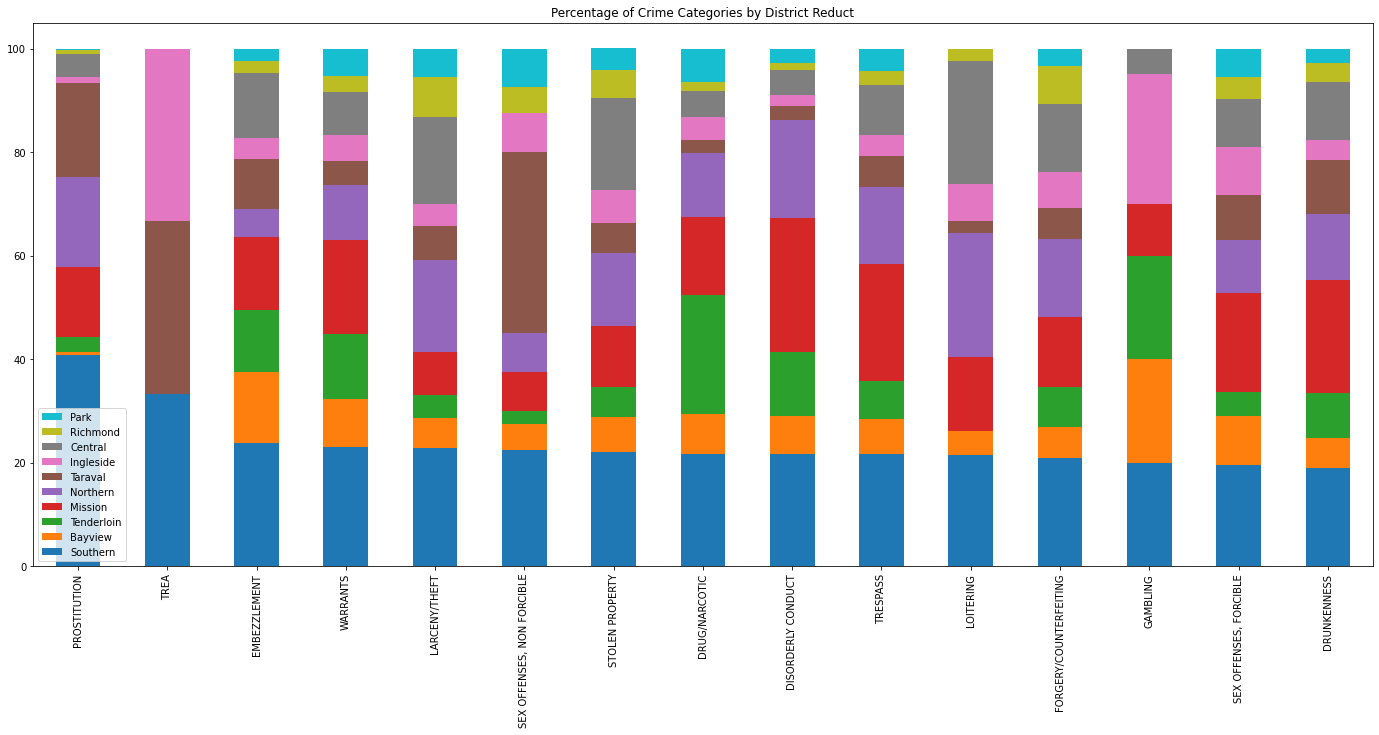

In [122]:
distperccatsort_head.plot(kind="bar", stacked=True, figsize=(24, 10),title="Percentage of Crime Categories by District Reduct", legend="reverse")
plt.savefig("District Percent Crime Types Abridge.png")

In [92]:
####

In [93]:
distsumcat_df=pd.concat([allcrimes_sout_cnt, allcrimes_bayv_cnt, allcrimes_tend_cnt, allcrimes_miss_cnt, allcrimes_nort_cnt, allcrimes_tara_cnt, allcrimes_ingl_cnt, allcrimes_cent_cnt, allcrimes_rich_cnt, allcrimes_park_cnt], axis=1)
distsumcat_df.columns=["Southern", "Bayview", "Tenderloin", "Mission", "Northern", "Taraval", "Ingleside", "Central", "Richmond", "Park"]
distsumcat_df

,Southern,Bayview,Tenderloin,Mission,Northern,Taraval,Ingleside,Central,Richmond,Park
LARCENY/THEFT,9203.0,2357.0,1825.0,3321.0,7219.0,2605.0,1781,6740.0,3133.0,2224.0
OTHER OFFENSES,3336.0,2353.0,1237.0,2990.0,2219.0,1751.0,1867,1737.0,1022.0,1087.0
ASSAULT,2352.0,1775.0,1196.0,2110.0,1536.0,918.0,1506,1187.0,473.0,524.0
VANDALISM,1439.0,1059.0,339.0,1091.0,1199.0,622.0,761,1148.0,477.0,454.0
WARRANTS,1367.0,548.0,739.0,1073.0,624.0,273.0,307,489.0,175.0,319.0
SUSPICIOUS OCC,962.0,610.0,480.0,945.0,600.0,451.0,527,580.0,358.0,269.0
DRUG/NARCOTIC,923.0,327.0,971.0,639.0,527.0,108.0,191,207.0,76.0,274.0
BURGLARY,842.0,521.0,161.0,793.0,803.0,695.0,534,645.0,395.0,413.0
MISSING PERSON,617.0,484.0,170.0,532.0,398.0,439.0,536,288.0,229.0,645.0
VEHICLE THEFT,613.0,1081.0,153.0,932.0,739.0,538.0,915,481.0,515.0,452.0


#### Stacked Bar Chart of Total Number of Crimes by Category for Each District

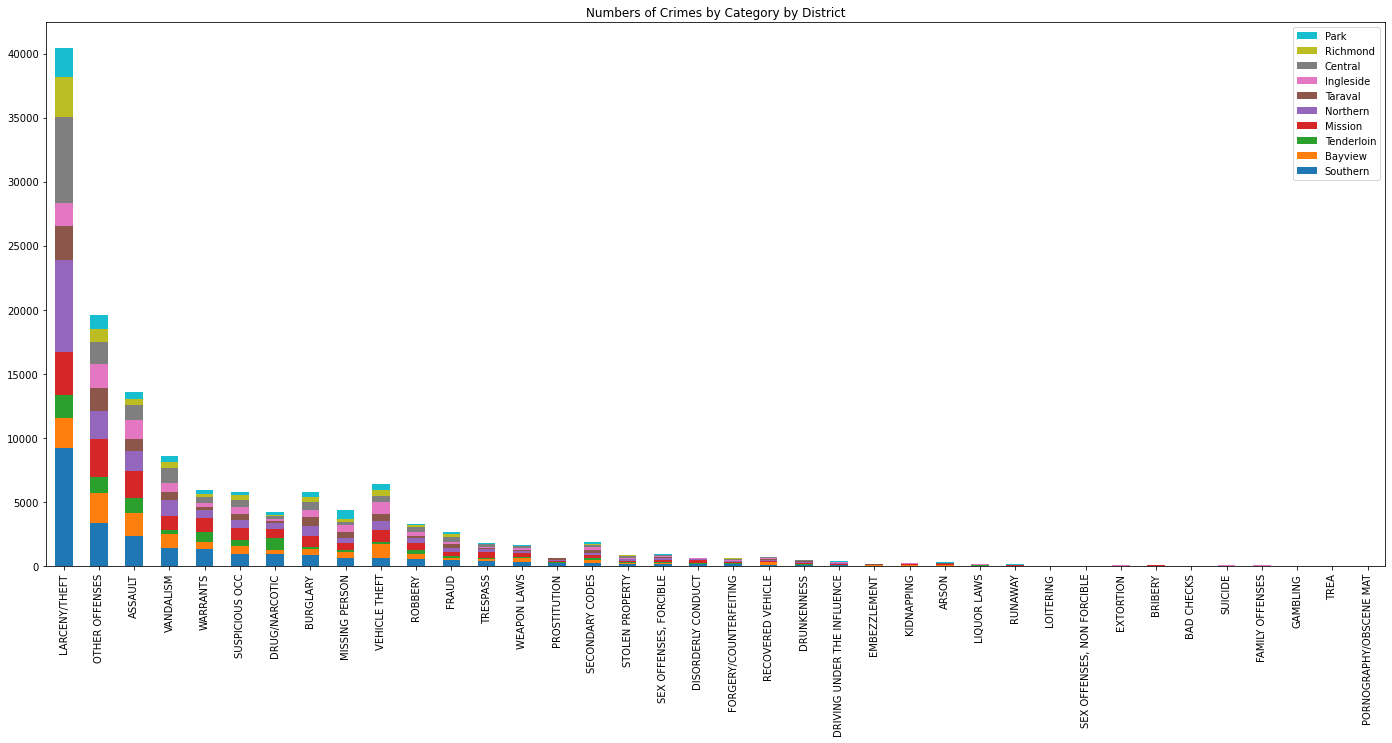

In [94]:
distsumcat_df.plot(kind="bar", stacked=True, figsize=(24, 10),title="Numbers of Crimes by Category by District", legend="reverse")
plt.savefig("Crime Cat Counts by District.png")

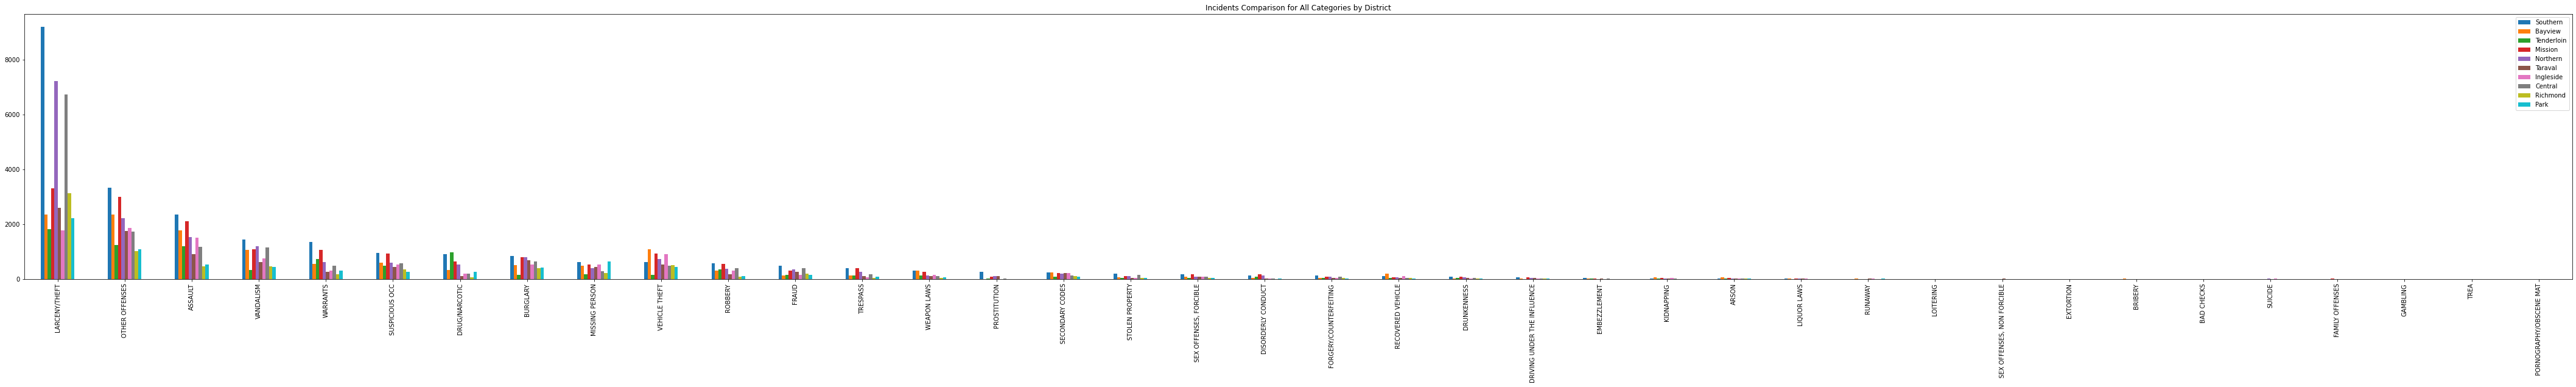

In [95]:
bardistinccnt=distsumcat_df.plot(kind="bar", title="Incidents Comparison for All Categories by District",figsize=(75,8))

#### Districts with Highest and Lowest of Each Crime Category

In [96]:
# Use idxmax and idxmin methods on the dataframe with an axis of 1 to return the column name of the highest value in each row of the df
hinum=distsumcat_df.idxmax(axis=1)
lonum=distsumcat_df.idxmin(axis=1)
print("The Districts with Highest Crime Numbers by Category are:")
print(hinum)
print("The Districts with the Lowest Crime Numbers by Category are:")
print(lonum)

The Districts with Highest Crime Numbers by Category are:
LARCENY/THEFT                    Southern
OTHER OFFENSES                   Southern
ASSAULT                          Southern
VANDALISM                        Southern
WARRANTS                         Southern
SUSPICIOUS OCC                   Southern
DRUG/NARCOTIC                  Tenderloin
BURGLARY                         Southern
MISSING PERSON                       Park
VEHICLE THEFT                     Bayview
ROBBERY                          Southern
FRAUD                            Southern
TRESPASS                          Mission
WEAPON LAWS                      Southern
PROSTITUTION                     Southern
SECONDARY CODES                  Southern
STOLEN PROPERTY                  Southern
SEX OFFENSES, FORCIBLE           Southern
DISORDERLY CONDUCT                Mission
FORGERY/COUNTERFEITING           Southern
RECOVERED VEHICLE                 Bayview
DRUNKENNESS                       Mission
DRIVING UNDER THE 

In [97]:
hilocrimedist_df=pd.concat([hinum,lonum], axis=1)
hilocrimedist_df.columns=["Highest District", "Lowest District"]
print(" Districts With the Highest and Lowest Numbers for Each Crime Category")
print(hilocrimedist_df)
hilocrimedist_df.to_excel("Hi Lo Districts by Cat.xlsx")

 Districts With the Highest and Lowest Numbers for Each Crime Category
                            Highest District Lowest District
LARCENY/THEFT                       Southern       Ingleside
OTHER OFFENSES                      Southern        Richmond
ASSAULT                             Southern        Richmond
VANDALISM                           Southern      Tenderloin
WARRANTS                            Southern        Richmond
SUSPICIOUS OCC                      Southern            Park
DRUG/NARCOTIC                     Tenderloin        Richmond
BURGLARY                            Southern      Tenderloin
MISSING PERSON                          Park      Tenderloin
VEHICLE THEFT                        Bayview      Tenderloin
ROBBERY                             Southern        Richmond
FRAUD                               Southern         Bayview
TRESPASS                             Mission        Richmond
WEAPON LAWS                         Southern        Richmond
PROSTITUTION  

#### Mean Values for Crime Category Incidents

In [98]:
catmean=round(distsumcat_df.mean(axis=1),2)
catmean

LARCENY/THEFT                  4040.80
OTHER OFFENSES                 1959.90
ASSAULT                        1357.70
VANDALISM                       858.90
WARRANTS                        591.40
SUSPICIOUS OCC                  578.20
DRUG/NARCOTIC                   424.30
BURGLARY                        580.20
MISSING PERSON                  433.80
VEHICLE THEFT                   641.90
ROBBERY                         329.90
FRAUD                           263.50
TRESPASS                        181.20
WEAPON LAWS                     165.80
PROSTITUTION                     64.10
SECONDARY CODES                 184.10
STOLEN PROPERTY                  88.20
SEX OFFENSES, FORCIBLE           94.00
DISORDERLY CONDUCT               65.80
FORGERY/COUNTERFEITING           61.90
RECOVERED VEHICLE                73.60
DRUNKENNESS                      46.50
DRIVING UNDER THE INFLUENCE      37.80
EMBEZZLEMENT                     16.80
KIDNAPPING                       25.70
ARSON                    

In [99]:
catmin=round(distsumcat_df.min(axis=1),2)
catmin

LARCENY/THEFT                  1781.0
OTHER OFFENSES                 1022.0
ASSAULT                         473.0
VANDALISM                       339.0
WARRANTS                        175.0
SUSPICIOUS OCC                  269.0
DRUG/NARCOTIC                    76.0
BURGLARY                        161.0
MISSING PERSON                  170.0
VEHICLE THEFT                   153.0
ROBBERY                         101.0
FRAUD                           132.0
TRESPASS                         49.0
WEAPON LAWS                      56.0
PROSTITUTION                      2.0
SECONDARY CODES                  93.0
STOLEN PROPERTY                  37.0
SEX OFFENSES, FORCIBLE           40.0
DISORDERLY CONDUCT                9.0
FORGERY/COUNTERFEITING           21.0
RECOVERED VEHICLE                29.0
DRUNKENNESS                      13.0
DRIVING UNDER THE INFLUENCE      12.0
EMBEZZLEMENT                      4.0
KIDNAPPING                        8.0
ARSON                            13.0
LIQUOR LAWS 

In [100]:
catmax=round(distsumcat_df.max(axis=1),2)
catmax

LARCENY/THEFT                  9203.0
OTHER OFFENSES                 3336.0
ASSAULT                        2352.0
VANDALISM                      1439.0
WARRANTS                       1367.0
SUSPICIOUS OCC                  962.0
DRUG/NARCOTIC                   971.0
BURGLARY                        842.0
MISSING PERSON                  645.0
VEHICLE THEFT                  1081.0
ROBBERY                         588.0
FRAUD                           482.0
TRESPASS                        412.0
WEAPON LAWS                     306.0
PROSTITUTION                    262.0
SECONDARY CODES                 255.0
STOLEN PROPERTY                 195.0
SEX OFFENSES, FORCIBLE          184.0
DISORDERLY CONDUCT              171.0
FORGERY/COUNTERFEITING          129.0
RECOVERED VEHICLE               196.0
DRUNKENNESS                     101.0
DRIVING UNDER THE INFLUENCE      66.0
EMBEZZLEMENT                     40.0
KIDNAPPING                       60.0
ARSON                            71.0
LIQUOR LAWS 

In [101]:
catrange=catmax-catmin
catrange

LARCENY/THEFT                  7422.0
OTHER OFFENSES                 2314.0
ASSAULT                        1879.0
VANDALISM                      1100.0
WARRANTS                       1192.0
SUSPICIOUS OCC                  693.0
DRUG/NARCOTIC                   895.0
BURGLARY                        681.0
MISSING PERSON                  475.0
VEHICLE THEFT                   928.0
ROBBERY                         487.0
FRAUD                           350.0
TRESPASS                        363.0
WEAPON LAWS                     250.0
PROSTITUTION                    260.0
SECONDARY CODES                 162.0
STOLEN PROPERTY                 158.0
SEX OFFENSES, FORCIBLE          144.0
DISORDERLY CONDUCT              162.0
FORGERY/COUNTERFEITING          108.0
RECOVERED VEHICLE               167.0
DRUNKENNESS                      88.0
DRIVING UNDER THE INFLUENCE      54.0
EMBEZZLEMENT                     36.0
KIDNAPPING                       52.0
ARSON                            58.0
LIQUOR LAWS 

In [102]:
catperc=round((catmin/catmax)*100,2)
catperc

LARCENY/THEFT                   19.35
OTHER OFFENSES                  30.64
ASSAULT                         20.11
VANDALISM                       23.56
WARRANTS                        12.80
SUSPICIOUS OCC                  27.96
DRUG/NARCOTIC                    7.83
BURGLARY                        19.12
MISSING PERSON                  26.36
VEHICLE THEFT                   14.15
ROBBERY                         17.18
FRAUD                           27.39
TRESPASS                        11.89
WEAPON LAWS                     18.30
PROSTITUTION                     0.76
SECONDARY CODES                 36.47
STOLEN PROPERTY                 18.97
SEX OFFENSES, FORCIBLE          21.74
DISORDERLY CONDUCT               5.26
FORGERY/COUNTERFEITING          16.28
RECOVERED VEHICLE               14.80
DRUNKENNESS                     12.87
DRIVING UNDER THE INFLUENCE     18.18
EMBEZZLEMENT                    10.00
KIDNAPPING                      13.33
ARSON                           18.31
LIQUOR LAWS 

In [103]:
catmul=round((catmax/catmin),2)
catmul

LARCENY/THEFT                    5.17
OTHER OFFENSES                   3.26
ASSAULT                          4.97
VANDALISM                        4.24
WARRANTS                         7.81
SUSPICIOUS OCC                   3.58
DRUG/NARCOTIC                   12.78
BURGLARY                         5.23
MISSING PERSON                   3.79
VEHICLE THEFT                    7.07
ROBBERY                          5.82
FRAUD                            3.65
TRESPASS                         8.41
WEAPON LAWS                      5.46
PROSTITUTION                   131.00
SECONDARY CODES                  2.74
STOLEN PROPERTY                  5.27
SEX OFFENSES, FORCIBLE           4.60
DISORDERLY CONDUCT              19.00
FORGERY/COUNTERFEITING           6.14
RECOVERED VEHICLE                6.76
DRUNKENNESS                      7.77
DRIVING UNDER THE INFLUENCE      5.50
EMBEZZLEMENT                    10.00
KIDNAPPING                       7.50
ARSON                            5.46
LIQUOR LAWS 

In [104]:
catcomp_df=pd.concat([catmax, catmin],axis=1)
catcomp_df.columns=["Highest District Incidents", "Lowest District Incidents"]
catcomp_df

,Highest District Incidents,Lowest District Incidents
LARCENY/THEFT,9203.0,1781.0
OTHER OFFENSES,3336.0,1022.0
ASSAULT,2352.0,473.0
VANDALISM,1439.0,339.0
WARRANTS,1367.0,175.0
SUSPICIOUS OCC,962.0,269.0
DRUG/NARCOTIC,971.0,76.0
BURGLARY,842.0,161.0
MISSING PERSON,645.0,170.0
VEHICLE THEFT,1081.0,153.0


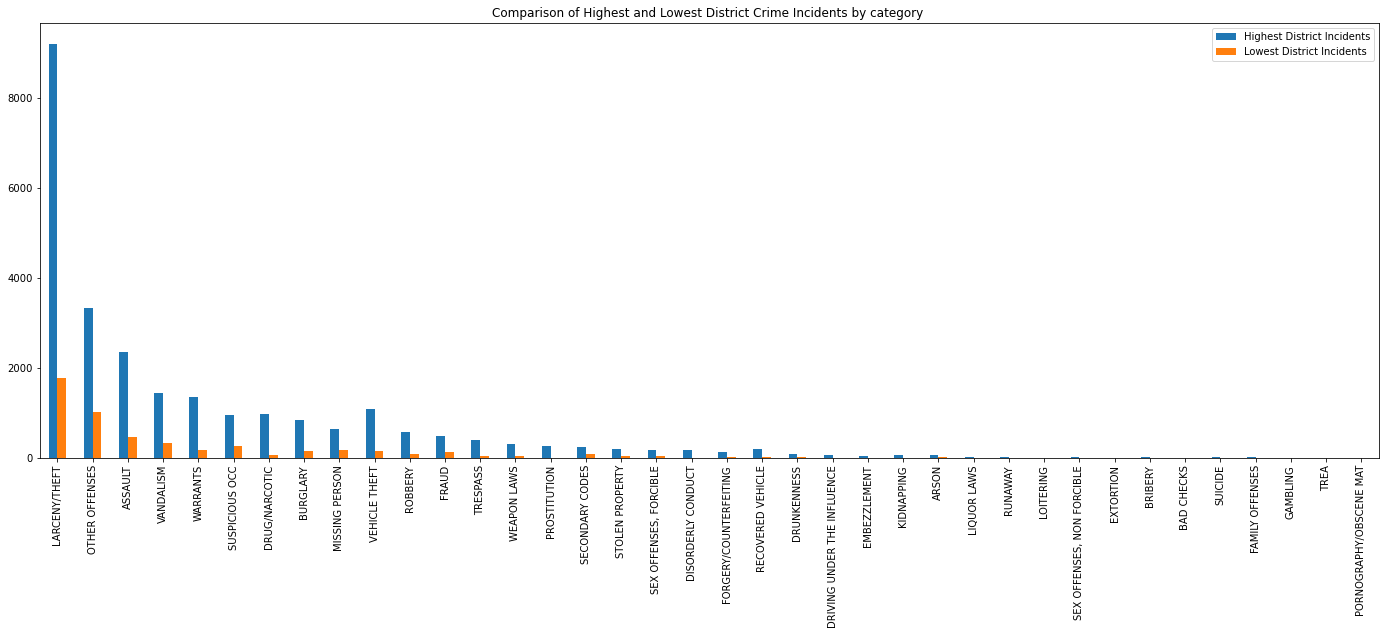

In [105]:
barccomp=catcomp_df.plot(kind="bar", title="Comparison of Highest and Lowest District Crime Incidents by category ",figsize=(24,8))
plt.savefig("Hi vs Lo District by Cat.png")

In [106]:
catcompare_df=pd.concat([catmax, catmin, catrange, catmul],axis=1)
catcompare_df.columns=["Highest District Incidents", "Lowest District Incidents", "Difference", "Max>Min Multiplier"]
catcompare_df.to_excel("Hi Lo Districts Cat Compare.xlsx")
catcompare_df

,Highest District Incidents,Lowest District Incidents,Difference,Max>Min Multiplier
LARCENY/THEFT,9203.0,1781.0,7422.0,5.17
OTHER OFFENSES,3336.0,1022.0,2314.0,3.26
ASSAULT,2352.0,473.0,1879.0,4.97
VANDALISM,1439.0,339.0,1100.0,4.24
WARRANTS,1367.0,175.0,1192.0,7.81
SUSPICIOUS OCC,962.0,269.0,693.0,3.58
DRUG/NARCOTIC,971.0,76.0,895.0,12.78
BURGLARY,842.0,161.0,681.0,5.23
MISSING PERSON,645.0,170.0,475.0,3.79
VEHICLE THEFT,1081.0,153.0,928.0,7.07


## SCRATCH  - FOR REFERENCE ONLY

#### Changing of Military Time in Dataframe to 2 Digits 

In [107]:
sfcrimeworkcopy_df=sfcrimedata.copy()


In [108]:
sfcrimeworkcopy_df["Time"]=sfcrimeworkcopy_df["Time"].str[:-3]
sfcrimeworkcopy_df.head()


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,1/29/2016 0:00,11,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,1/29/2016 0:00,11,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,4/25/2016 0:00,14,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1/5/2016 0:00,23,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1/1/2016 0:00,0,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13


In [94]:
soutlatave=sout_dist_df["Y"].mean()
soutlngave=sout_dist_df["X"].mean()

bayvlatave=bayv_dist_df["Y"].mean()
bayvlngave=bayv_dist_df["X"].mean()

tendlatave=tend_dist_df["Y"].mean()
tendlngave=tend_dist_df["X"].mean()

misslatave=miss_dist_df["Y"].mean()
misslngave=miss_dist_df["X"].mean()

nortlatave=nort_dist_df["Y"].mean()
nortlngave=nort_dist_df["X"].mean()

taralatave=tara_dist_df["Y"].mean()
taralngave=tara_dist_df["X"].mean()

ingllatave=ingl_dist_df["Y"].mean()
ingllngave=ingl_dist_df["X"].mean()

centlatave=cent_dist_df["Y"].mean()
centlngave=cent_dist_df["X"].mean()

richlatave=rich_dist_df["Y"].mean()
richlngave=rich_dist_df["X"].mean()

parklatave=park_dist_df["Y"].mean()
parklngave=park_dist_df["X"].mean()

In [95]:
marker_locations=[(soutlatave,soutlngave),(bayvlatave,bayvlngave),(tendlatave,tendlngave),(misslatave,misslngave),(nortlatave,nortlngave),(taralatave,taralngave),(ingllatave,ingllngave),(centlatave,centlngave),(richlatave,richlngave),(parklatave,parklngave), ]
crime_coords=sfonlycriminal[["Y", "X"]]
fig=gmaps.figure()
markers=gmaps.marker_layer(marker_locations)
layer=gmaps.heatmap_layer(crime_coords)
fig.add_layer(layer)
fig.add_layer(markers)

layer.max_intensity = 100
layer.point_radius = 15
fig

Figure(layout=FigureLayout(height='420px'))

In [96]:
print(marker_locations)

[(37.77975835626845, -122.40530878395974), (37.73978372752718, -122.39362051168489), (37.783562270184106, -122.41254045400939), (37.76032337059484, -122.41935976730261), (37.786637486709694, -122.42698376670276), (37.738192034248016, -122.47772707185214), (37.72721461292236, -122.42945751673126), (37.796973817512864, -122.40948998587596), (37.77937981409592, -122.4738814220417), (37.770429882438115, -122.44548422669008)]
